#**NOTEBOOK DE LIMPIEZA DE DATOS DEL DATASET DEL PROYECTO**

**Integrantes**

1.  *David Stivens Ordoñez*
2.   *Sebastian Montañez*
3.   *Santiago Henao Gutierrez*



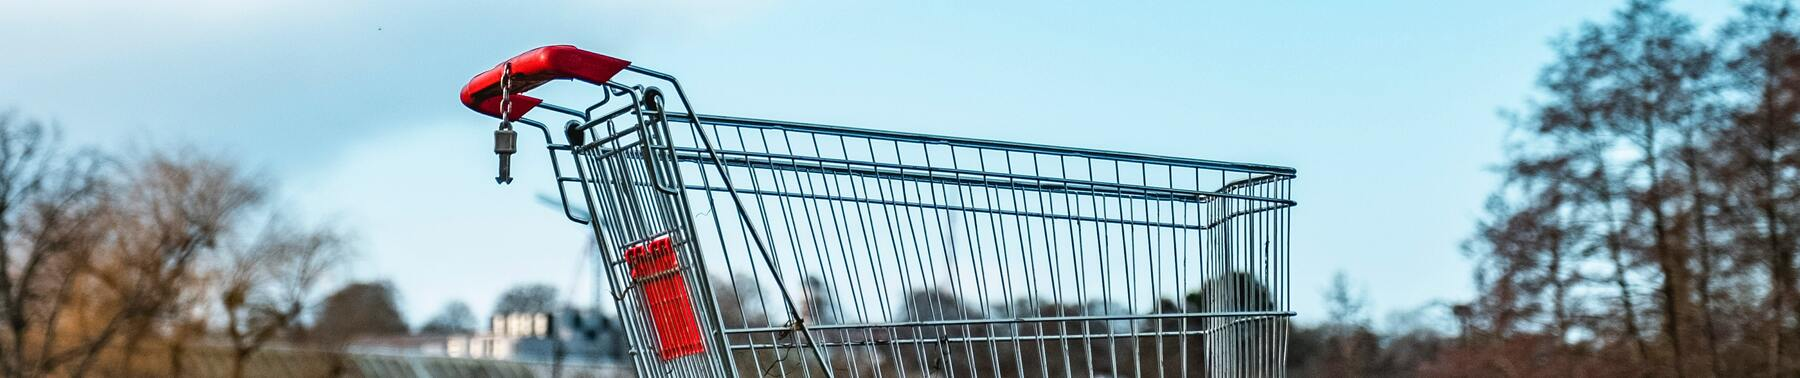

**CONTEXTO**

es un conjunto de datos que simula las operaciones de una tienda minorista global que vende una amplia gama de productos a través de diversas categorías, tales como tecnología, muebles y suministros de oficina. Este dataset incluye información detallada sobre las ventas, retornos, clientes, y envíos en diferentes regiones del mundo.

Uno de los aspectos más valiosos de este dataset es que también incluye información sobre los retornos de productos, permitiendo realizar análisis sobre las causas y efectos de las devoluciones en las operaciones comerciales. Además, contiene datos geográficos de los clientes, lo que facilita la
evaluación de las tendencias de ventas por país y ciudad, así como el análisis del comportamiento de los clientes en diferentes regiones.

**PROBLEMATICA**

Global Super Store enfrenta problemas clave que afectan su rentabilidad. Existen disparidades significativas entre las ventas y las ganancias en varias subcategorías, como Phones y Tables, donde los altos costos y los descuentos excesivos están erosionando los márgenes. Además, algunas regiones como Western Asia y Western Africa están generando pérdidas considerables debido a un mal manejo de costos y estrategias de ventas ineficientes. Los altos costos de envío también están afectando la rentabilidad en categorías clave. Se recomienda revisar la estrategia de descuentos, optimizar los costos de operación en regiones problemáticas y reducir los costos de envío para mejorar los márgenes de utilidad.

### DEPENDENCIAS Y LIBRERIAS

####Dependencias

In [2]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=f0a22cd213a7ca74fad53839aea53c0620048fe3441bc69b790f8068da8e84e3
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [3]:
!pip install geopandas plotly

##### Conexión con google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Librerias

In [5]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql
import matplotlib.dates as mdates
import warnings
import matplotlib.ticker as mtick


### CARGUE DE DATOS


Cargamos todos los dataframes de los diferentes csv que trar este dataset

In [6]:
df_Orders = pd.read_csv("/content/drive/MyDrive/DATASET - GESTION Y ALMACENAMIENTO DE DATOS/Orders.csv" , sep=";")
df_Returns = pd.read_csv("/content/drive/MyDrive/DATASET - GESTION Y ALMACENAMIENTO DE DATOS/Returns.csv", sep=";")
df_People = pd.read_csv("/content/drive/MyDrive/DATASET - GESTION Y ALMACENAMIENTO DE DATOS/People.csv",  sep=";")

## LIMPIEZA DE DATOS

###Orders

#### Tipos de datos

revisamos los tipos de datos de este dataframe y miramos los 2 primeros registros para ver si tenemos que cambiarle el tipo de dato a estos

In [7]:
df_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [8]:
df_Orders.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,13/11/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,"221,98","2,00","0,00","62,15","40,77",High
1,26341,IN-2014-JR162107-41675,5/02/2014,7/02/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3709,40","9,00","0,10","-288,77","923,63",Critical


In [9]:
# Reemplazar comas por puntos en varias columnas
df_Orders['Sales'] = df_Orders['Sales'].str.replace(",", ".")
df_Orders['Quantity'] = df_Orders['Quantity'].str.replace(",", ".")
df_Orders['Discount'] = df_Orders['Discount'].str.replace(",", ".")
df_Orders['Profit'] = df_Orders['Profit'].str.replace(",", ".")
df_Orders['Shipping Cost'] = df_Orders['Shipping Cost'].str.replace(",", ".")


In [10]:
# Convertir columnas a tipos específicos en pandas
df_Orders['Sales'] = df_Orders['Sales'].astype(float)
df_Orders['Quantity'] = df_Orders['Quantity'].astype(float).apply(lambda x: int(x))
df_Orders['Discount'] = df_Orders['Discount'].astype(float)
df_Orders['Profit'] = df_Orders['Profit'].astype(float)
df_Orders['Shipping Cost'] = df_Orders['Shipping Cost'].astype(float)


In [11]:
df_Orders = df_Orders.rename(columns={
    'Order ID': 'Order_ID',
    'Order Date': 'Order_Date',
    'Ship Date': 'Ship_Date',
    'Ship Mode': 'Ship_Mode',
    'Customer ID': 'Customer_ID',
    'Customer Name': 'Customer_Name',
    'Postal Code': 'Postal_Code',
    'Product ID': 'Product_ID',
    'Product Name': 'Product_Name',
    'Shipping Cost': 'Shipping_Cost',
    'Order Priority': 'Order_Priority' ,
    'Sub-Category': 'SubCategory'
})


df_Orders['Order_Date'] = pd.to_datetime(df_Orders['Order_Date'], format='%d/%m/%Y')
df_Orders['Ship_Date'] = pd.to_datetime(df_Orders['Ship_Date'], format='%d/%m/%Y')

Modificamos el nombre de las columas para que se nos facilité su llamado cuando las necesitamos, tambien cambiamos el tipo de datos al verdadero tipo que deberian tener, que los numericos sean numericos, lo de fecha sean tipo date y así.

In [12]:
df_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order_ID        51290 non-null  object        
 2   Order_Date      51290 non-null  datetime64[ns]
 3   Ship_Date       51290 non-null  datetime64[ns]
 4   Ship_Mode       51290 non-null  object        
 5   Customer_ID     51290 non-null  object        
 6   Customer_Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal_Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product_ID      51290 non-null  object        
 15  Ca

In [13]:
df_Orders.head(2)

,Row ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_ID,Category,SubCategory,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical


####Valores Unicos por Columna

No tenemos variables con categorias mal escritas, entonces no tendriamos que arreglar nada en esta parte

In [14]:
# Seleccionar solo las columnas de tipo 'object' (categóricas)
unique_columns = df_Orders[['Ship_Mode', 'Segment', 'Region', 'Market', 'Category', 'SubCategory', 'Order_Priority']].columns

# Imprimir los valores únicos para cada columna categórica
for col in unique_columns:
    print(f"Valores únicos en '{col}':")
    print(df_Orders[col].unique())
    print("\n")


Valores únicos en 'Ship_Mode':
['First Class' 'Second Class' 'Same Day' 'Standard Class']


Valores únicos en 'Segment':
['Consumer' 'Corporate' 'Home Office']


Valores únicos en 'Region':
['Central US' 'Oceania' 'Western Europe' 'Western Africa' 'Western US'
 'Southern Asia' 'Western Asia' 'South America' 'Eastern Asia'
 'Southern Europe' 'Eastern Africa' 'Eastern Europe' 'Northern Europe'
 'Central America' 'Eastern US' 'Caribbean' 'Central Africa'
 'Southeastern Asia' 'Southern US' 'North Africa' 'Southern Africa'
 'Canada' 'Central Asia']


Valores únicos en 'Market':
['USCA' 'Asia Pacific' 'Europe' 'Africa' 'LATAM']


Valores únicos en 'Category':
['Technology' 'Furniture' 'Office Supplies']


Valores únicos en 'SubCategory':
['Phones' 'Chairs' 'Copiers' 'Tables' 'Bookcases' 'Art' 'Appliances'
 'Storage' 'Fasteners' 'Machines' 'Accessories' 'Furnishings' 'Binders'
 'Labels' 'Paper' 'Supplies' 'Envelopes']


Valores únicos en 'Order_Priority':
['High' 'Critical' 'Medium' 'Low']




#### Eliminamos Columnas Innecesarias


Se eliminó esta columna porque es el conteo de registros que tiene la tabla, no es necesario para el dataframe

In [15]:
df_Orders = df_Orders.drop(columns=['Row ID'])

####Duplicados

In [16]:
duplicates = df_Orders[df_Orders.duplicated(keep=False)]
duplicates.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,...,Product_ID,Category,SubCategory,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority


no tenemos duplicados, entonces no hacemos nada por aquí.

#### Datos Nulos


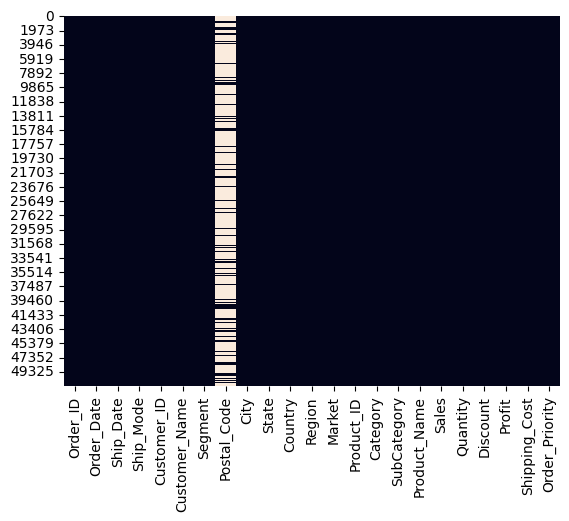

In [17]:
#mapa de calor de datos nulos
sns.heatmap(df_Orders.isnull(), cbar=False)
plt.show()

vemos que solo para la Columna **Postal_Code** si hay nulos, pero esta información en Irrelevante, ya que tenemos la Ciudad, Estado y Pais del Cliente, esta columna la podemos eliminar

In [18]:
df_Orders = df_Orders.drop(columns=['Postal_Code'])

In [19]:
# Contar los nulos por columna
null_counts = df_Orders.isnull().sum()
null_counts

,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
City,0
State,0
Country,0


#### Variables Numericas

In [20]:
df_Orders.describe()

,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,246.490685,3.476545,0.142883,28.610970,26.478664
min,2012-01-01 00:00:00,2012-01-03 00:00:00,0.440000,1.000000,0.000000,-6599.980000,1.000000
25%,2013-06-19 00:00:00,2013-06-23 00:00:00,30.762500,2.000000,0.000000,0.000000,2.610000
50%,2014-07-08 00:00:00,2014-07-12 00:00:00,85.055000,3.000000,0.000000,9.240000,7.790000
75%,2015-05-22 00:00:00,2015-05-26 00:00:00,251.055000,5.000000,0.200000,36.810000,24.450000
max,2015-12-31 00:00:00,2016-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.980000,933.570000
std,NaN,NaN,487.565388,2.278766,0.212285,174.341066,57.251368


Vemos que para las variables numericas, Omitiendo las de fechas, estan con valores normales para sus minimos y maximos, entonces no habria problema al tratar con ellos.

### Returns

#### Tipos de datos

revisamos los tipos de datos de este dataframe y miramos los 2 primeros registros para ver si tenemos que cambiarle el tipo de dato a estos

In [21]:
df_Returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1079 non-null   object
 1   Order ID  1079 non-null   object
 2   Region    1079 non-null   object
dtypes: object(3)
memory usage: 25.4+ KB


In [22]:
df_Returns.head(2)

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia


In [23]:
df_Returns = df_Returns.rename(columns={
    'Order ID': 'Order_ID'
})

No tuvimos que modificar los tipos de datos, ya que en este caso no hay datos numericos, pero si modificamos el nombre de una columna para su uso

In [24]:
df_Returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1079 non-null   object
 1   Order_ID  1079 non-null   object
 2   Region    1079 non-null   object
dtypes: object(3)
memory usage: 25.4+ KB


####Valores Unicos por Columna

No tenemos variables con categorias mal escritas, entonces no tendriamos que arreglar nada en esta parte

In [25]:
# Seleccionar solo las columnas de tipo 'object' (categóricas)
unique_columns = df_Returns.columns

# Imprimir los valores únicos para cada columna categórica
for col in unique_columns:
    print(f"Valores únicos en '{col}':")
    print(df_Returns[col].unique())
    print("\n")


Valores únicos en 'Returned':
['Yes']


Valores únicos en 'Order_ID':
['CA-2012-SA20830140-41210' 'IN-2012-PB19210127-41259'
 'CA-2012-SC20095140-41174' ... 'US-2013-SJ2021582-41543'
 'CA-2015-EB13870140-42269' 'EG-2014-PM894038-41846']


Valores únicos en 'Region':
['Central US' 'Eastern Asia' 'Oceania' 'Western Europe' 'Southern Europe'
 'Western Asia' 'Southern US' 'Southern Africa' 'Eastern US'
 'Eastern Europe' 'Southeastern Asia' 'Western US' 'Southern Asia'
 'Northern Europe' 'Eastern Canada' 'Central America' 'South America'
 'North Africa' 'Caribbean' 'Central Africa' 'Western Africa'
 'Eastern Africa' 'Central Asia' 'Western Canada']




#### Datos Nulos


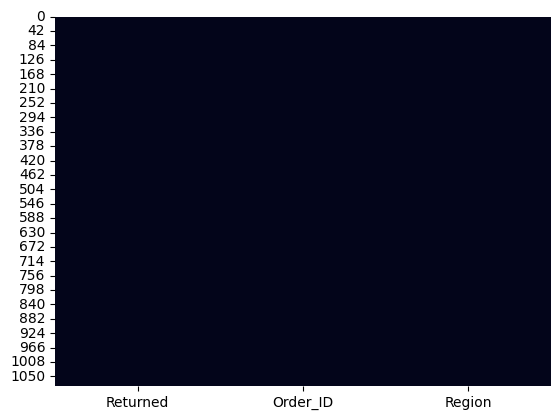

In [26]:
#mapa de calor de datos nulos
sns.heatmap(df_Returns.isnull(), cbar=False)
plt.show()

Nada hay problemas

In [27]:
# Contar los nulos por columna
null_counts = df_Returns.isnull().sum()
null_counts

,0
Returned,0
Order_ID,0
Region,0


#### Eliminamos Columnas Innecesarias


Se eliminó esta columna porque de por si con el nombre de la tabla ya sabemos que se devolvieron tales productos, y vemos que no tiene nulos, entonces no tendriamos problemas

In [28]:
df_Returns = df_Returns.drop(columns=['Returned'])

####Duplicados

In [29]:
duplicates = df_Returns[df_Returns.duplicated(keep=False)]
duplicates.head()

,Order_ID,Region


no tenemos duplicados, entonces no hacemos nada por aquí.

#### Variables Numericas

In [30]:
df_Returns.describe()

,Order_ID,Region
count,1079,1079
unique,1079,24
top,CA-2012-SA20830140-41210,Western Europe
freq,1,121


como no hay variables numericas, solo nos muestra esta informacion para las variables categoricas y vemos que todo está bien.

### People

#### Tipos de datos

revisamos los tipos de datos de este dataframe y miramos los 2 primeros registros para ver si tenemos que cambiarle el tipo de dato a estos

In [31]:
df_People.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  24 non-null     object
 1   Region  24 non-null     object
dtypes: object(2)
memory usage: 512.0+ bytes


In [32]:
df_People.head(2)

,Person,Region
0,Marilène Rousseau,Caribbean
1,Andile Ihejirika,Central Africa


No tuvimos que modificar los tipos de datos ni modificamos el nombre de alguna columna

####Valores Unicos por Columna

No tenemos variables con categorias mal escritas, entonces no tendriamos que arreglar nada en esta parte

In [33]:
# Seleccionar solo las columnas de tipo 'object' (categóricas)
unique_columns = df_People.columns

# Imprimir los valores únicos para cada columna categórica
for col in unique_columns:
    print(f"Valores únicos en '{col}':")
    print(df_People[col].unique())
    print("\n")


Valores únicos en 'Person':
['Marilène Rousseau' 'Andile\xa0Ihejirika' 'Nicodemo Bautista'
 'Cansu Peynirci' 'Lon Bonher' 'Wasswa\xa0Ahmed' 'Hadia Bousaid'
 'Lynne Marchand' 'Oxana Lagunov' 'Dolores Davis' 'Lindiwe\xa0Afolayan'
 'Miina Nylund' 'Kauri Anaru' 'Vasco Magalhães' 'Preecha Metharom'
 'Nora Cuijper' 'Chandrakant Chaudhri' 'Gavino Bove' 'Flannery Newton'
 'Katlego Akosua' 'Kaoru Xun' 'Angela Jephson' 'Gilbert Wolff'
 'Derrick Snyders']


Valores únicos en 'Region':
['Caribbean' 'Central Africa' 'Central America' 'Central Asia'
 'Central US' 'Eastern Africa' 'Eastern Asia' 'Eastern Canada'
 'Eastern Europe' 'Eastern US' 'North Africa' 'Northern Europe' 'Oceania'
 'South America' 'Southeastern Asia' 'Southern Africa' 'Southern Asia'
 'Southern Europe' 'Southern US' 'Western Africa' 'Western Asia'
 'Western Canada' 'Western Europe' 'Western US']




#### Datos Nulos


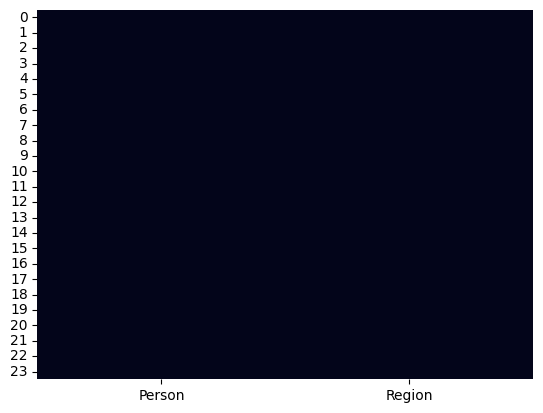

In [34]:
#mapa de calor de datos nulos
sns.heatmap(df_People.isnull(), cbar=False)
plt.show()

No hay problema

In [35]:
# Contar los nulos por columna
null_counts = df_People.isnull().sum()
null_counts

,0
Person,0
Region,0


#### Eliminamos Columnas Innecesarias


No tenemos columnas Innecesarias

####Duplicados

In [36]:
duplicates = df_People[df_People.duplicated(keep=False)]
duplicates.head()

,Person,Region


no tenemos duplicados, entonces no hacemos nada por aquí.

#### Variables Numericas

In [37]:
df_People.describe()

,Person,Region
count,24,24
unique,24,24
top,Marilène Rousseau,Caribbean
freq,1,1


como no hay variables numericas, solo nos muestra esta informacion para las variables categoricas y vemos que todo está bien.

## EXPORTAR CSV

In [38]:
# Exportar los dataframes
df_Orders.to_csv('df_Orders_Cleaned.csv', index=False, sep=';')
df_Returns.to_csv('df_Returns_Cleaned.csv', index=False, sep=';')
df_People.to_csv('df_People_Cleaned.csv', index=False, sep=';')


##VISUALIZACION

### Numericas

In [39]:
df_Orders_numeric = df_Orders.select_dtypes(include=[np.number])
print("Columnas Numéricas:")
print(df_Orders_numeric.columns)

Columnas Numéricas:
Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost'], dtype='object')


#### BoxPlots Variables numericas

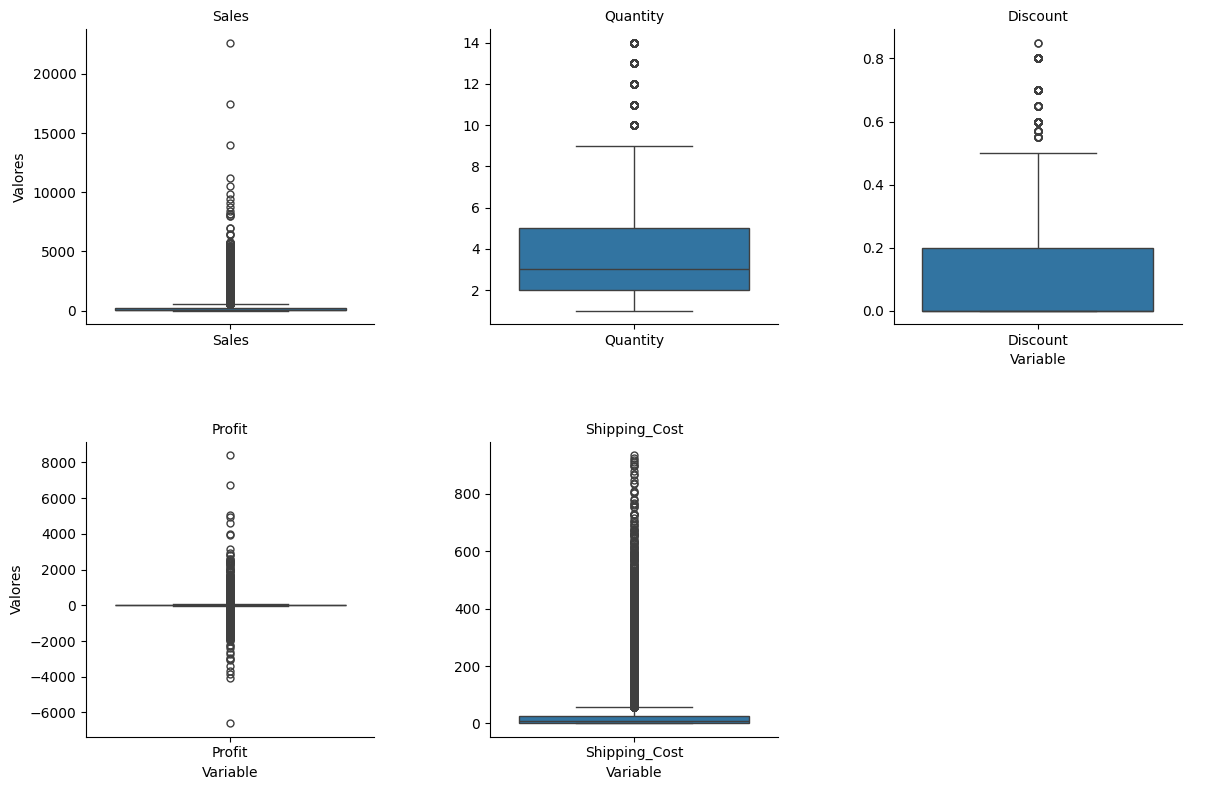

In [40]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Derretir el DataFrame para usar en Seaborn
melted_df = pd.melt(df_Orders_numeric)

# Crear un boxplot para cada variable independiente en una cuadrícula 3x3
g = sns.catplot(x='variable', y='value', col='variable', data=melted_df,
                kind='box', col_wrap=3, height=4, aspect=1, sharex=False, sharey=False)

# Rotar las etiquetas del eje x y ajustar detalles adicionales si es necesario
g.set_xticklabels(rotation=0)
g.set_titles("{col_name}")  # Establece el título de cada subplot para reflejar el nombre de la variable
g.set_axis_labels('Variable', 'Valores')  # Establece etiquetas de los ejes

# Ajustar el espacio si es necesario
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Mostrar el gráfico
plt.show()

#### Frecuencia de Ventas por grupos de montos

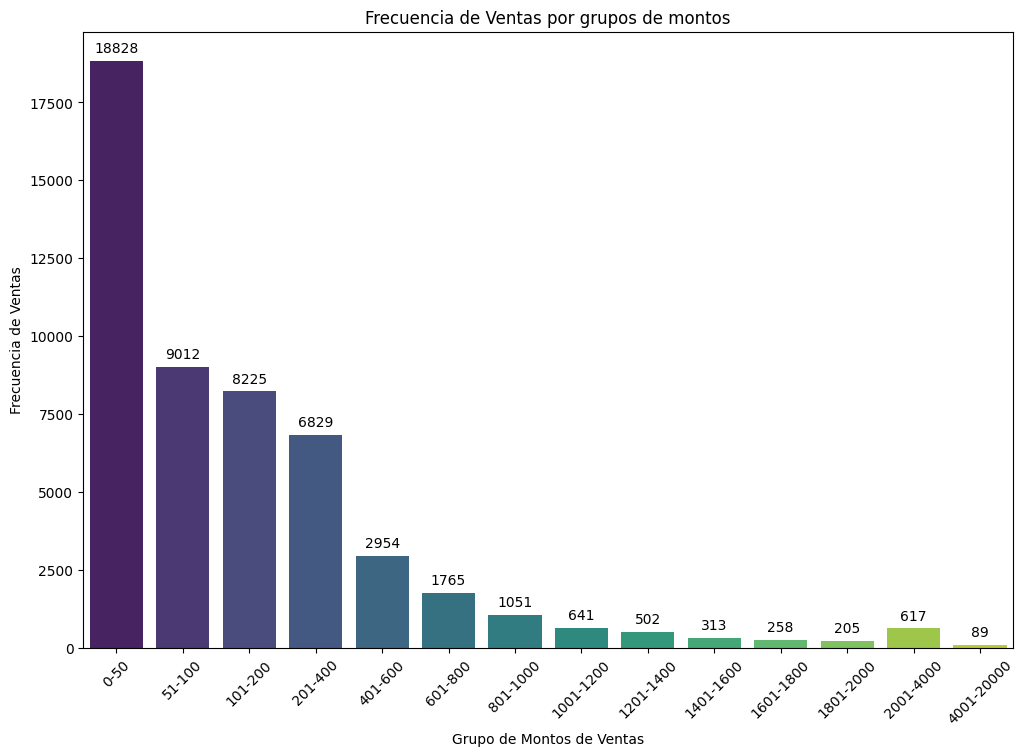

In [41]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Suponiendo que 'df_Orders_numeric' es tu DataFrame y tiene una columna 'Sales'
bins = [0, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 4000, 20000]
labels = ['0-50','51-100','101-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400', '1401-1600', '1601-1800', '1801-2000', '2001-4000', '4001-20000']
df_Orders_numeric['Sales_group'] = pd.cut(df_Orders_numeric['Sales'], bins=bins, labels=labels, right=False)

# Agrupar por 'Sales_group' y contar las ocurrencias
sales_group_count = df_Orders_numeric.groupby(['Sales_group'], observed=False).size().reset_index(name='count')

# Gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Sales_group', y='count', data=sales_group_count, palette='viridis', hue='Sales_group', legend=False)

# Añadiendo títulos y etiquetas
plt.title('Frecuencia de Ventas por grupos de montos')
plt.xlabel('Grupo de Montos de Ventas')
plt.ylabel('Frecuencia de Ventas')
plt.xticks(rotation=45)

# Añadir etiquetas de datos en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formato sin decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

**Distribución desigual de las ventas:**

* El grupo con el rango de ventas más bajo (0-50) tiene, con diferencia, la mayor
frecuencia, con más de 18,000 ventas. Esto sugiere que la mayoría de las transacciones en este conjunto de datos corresponden a montos bajos.

* La cantidad de ventas disminuye a medida que aumenta el rango de montos de
ventas, lo cual es típico en muchos mercados donde las ventas más pequeñas son
más frecuentes que las transacciones grandes.


**Diferencias significativas entre los grupos:**

* Se observa una gran diferencia entre el primer grupo (0-50) y el segundo grupo (51-100), con una caída de casi el 50% en la frecuencia de ventas. Esto podría indicar que una gran parte de los productos o servicios que se venden en este rango de precios son populares o accesibles.

* A partir del rango de ventas 401-600, la frecuencia baja considerablemente y se mantiene más baja, lo cual podría reflejar que es menos común que los clientes realicen compras de mayor valor.

#### Frecuencia de Ventas por grupos de Ganancias

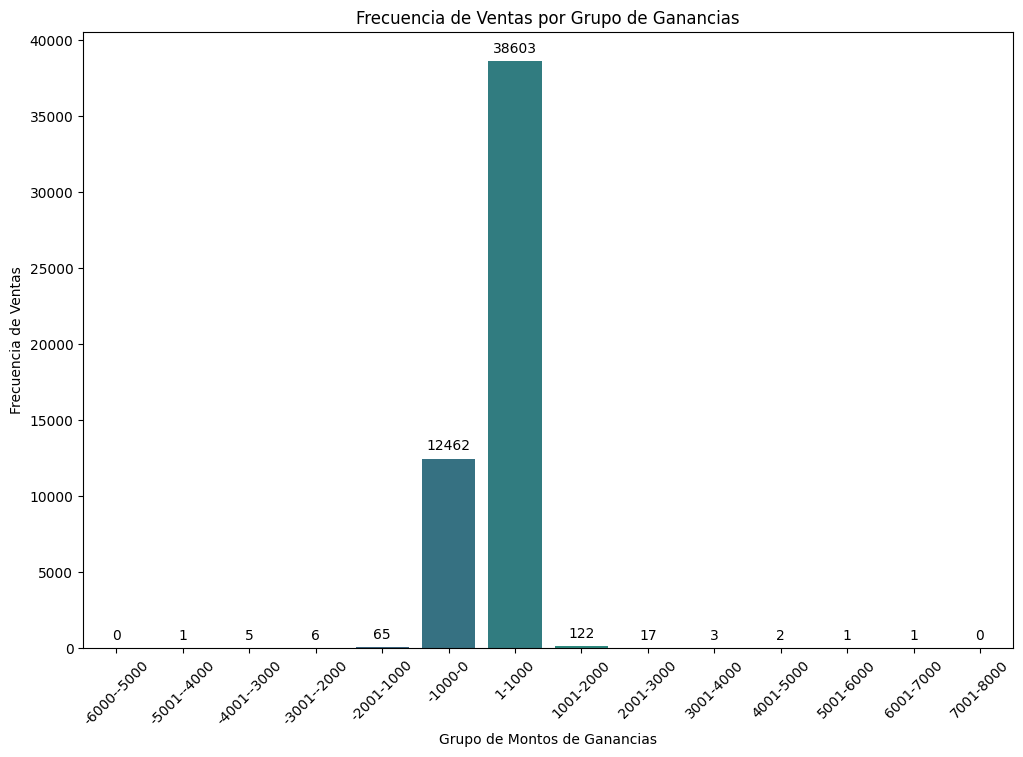

In [42]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Suponiendo que 'df_Orders_numeric'
bins = [-6000, -5000, -4000, -3000, -2000, -1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
labels = ['-6000--5000','-5001--4000','-4001--3000','-3001--2000','-2001-1000','-1000-0','1-1000','1001-2000','2001-3000','3001-4000','4001-5000','5001-6000','6001-7000','7001-8000']
df_Orders_numeric['Profit_group'] = pd.cut(df_Orders_numeric['Profit'], bins=bins, labels=labels, right=False)

# Agrupar por 'Sales_group' y contar las ocurrencias
sales_group_count = df_Orders_numeric.groupby(['Profit_group'], observed=False).size().reset_index(name='count')

# Gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Profit_group', y='count', data=sales_group_count, palette='viridis',hue='Profit_group', legend=False)

# Añadiendo títulos y etiquetas
plt.title('Frecuencia de Ventas por Grupo de Ganancias')
plt.xlabel('Grupo de Montos de Ganancias')
plt.ylabel('Frecuencia de Ventas')
plt.xticks(rotation=45)

# Añadir etiquetas de datos en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formato sin decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

**Distribución concentrada en un solo grupo:**

* La mayoría de las transacciones (38,603) se encuentran en el grupo de ganancias de 1-1000, lo que indica que la mayoría de las ventas generan ganancias dentro de este rango. Esta concentración tan alta sugiere que la mayoría de los productos vendidos son moderadamente rentables.

**Ganancias negativas**:

* Un número significativo de ventas (12,462) tiene ganancias negativas en el rango -1000-0. Esto podría indicar descuentos, devoluciones, o ventas a pérdida en ciertos productos o servicios. Sería importante investigar por qué se están generando tantas transacciones con pérdida.

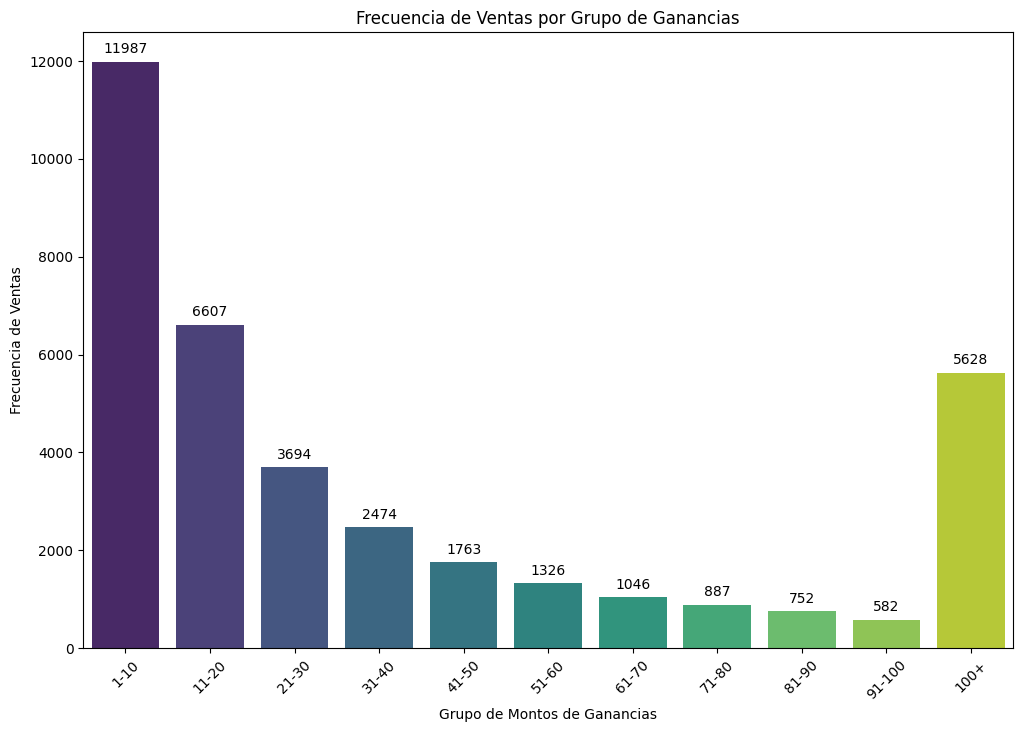

In [43]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Suponiendo que 'df_Orders_numeric'
bins = [ 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']
df_Orders_numeric['Profit_group'] = pd.cut(df_Orders_numeric['Profit'], bins=bins, labels=labels, right=False)

# Agrupar por 'Sales_group' y contar las ocurrencias
sales_group_count = df_Orders_numeric.groupby(['Profit_group'], observed=False).size().reset_index(name='count')

# Gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Profit_group', y='count', data=sales_group_count, palette='viridis',hue='Profit_group', legend=False)

# Añadiendo títulos y etiquetas
plt.title('Frecuencia de Ventas por Grupo de Ganancias')
plt.xlabel('Grupo de Montos de Ganancias')
plt.ylabel('Frecuencia de Ventas')
plt.xticks(rotation=45)

# Añadir etiquetas de datos en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formato sin decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

En esta nueva gráfica, que muestra la frecuencia de ventas por grupo de montos de ganancias en el rango de 1 a 1000, podemos observar los siguientes puntos complementarios al análisis previo:

**Distribución en ganancias bajas:**

* La mayor parte de las ventas se encuentran en los rangos de ganancias bajas, especialmente en el rango 0-10, que domina con 11,987 ventas. Esto sigue el patrón observado en la gráfica anterior, donde la mayoría de las ventas generan pequeñas ganancias.
* El rango siguiente, 11-20, sigue en frecuencia con 6,607 ventas, lo que muestra que aunque las ganancias aumentan, el número de transacciones disminuye a casi la mitad.
* A medida que los montos de ganancias aumentan, la frecuencia de ventas disminuye de manera constante, lo cual es común en muchos mercados: los productos con márgenes pequeños tienden a venderse más que aquellos con márgenes más grandes.

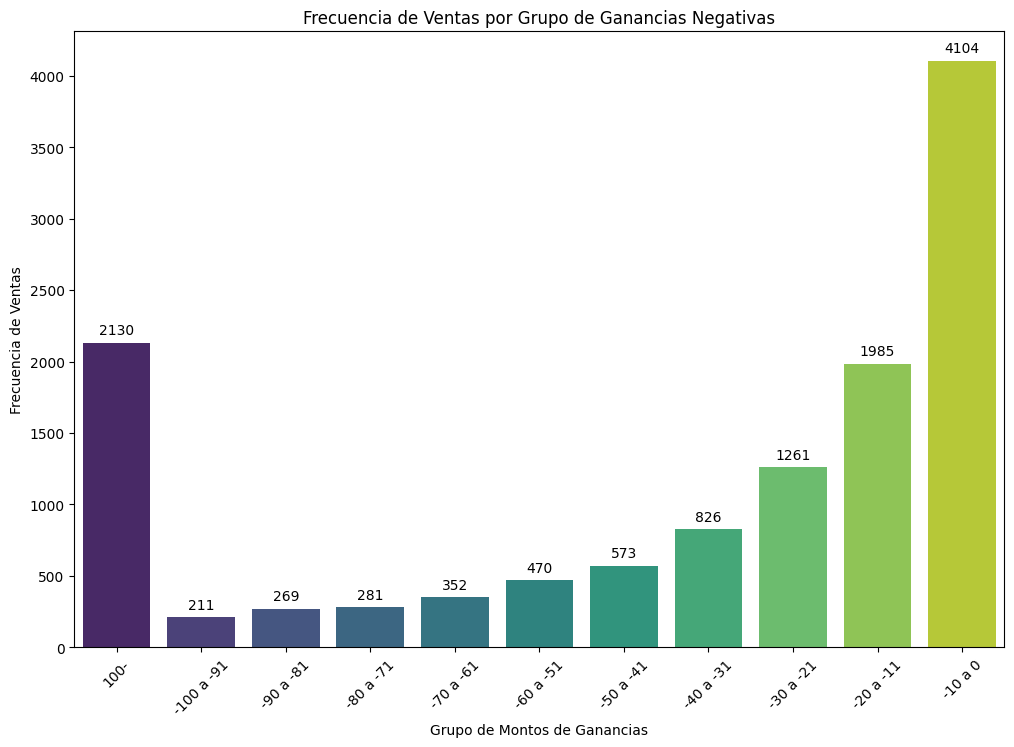

In [44]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Suponiendo que 'df_Orders_numeric'
bins = [ -1000, -100, -90,-80,-70,-60,-50,-40,-30,-20,-10,0]
labels = ['100-', '-100 a -91', '-90 a -81', '-80 a -71', '-70 a -61', '-60 a -51', '-50 a -41','-40 a -31', '-30 a -21', '-20 a -11', '-10 a 0',]
df_Orders_numeric['Profit_group'] = pd.cut(df_Orders_numeric['Profit'], bins=bins, labels=labels, right=False)

# Agrupar por 'Sales_group' y contar las ocurrencias
sales_group_count = df_Orders_numeric.groupby(['Profit_group'], observed=False).size().reset_index(name='count')

# Gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Profit_group', y='count', data=sales_group_count, palette='viridis',hue='Profit_group', legend=False)

# Añadiendo títulos y etiquetas
plt.title('Frecuencia de Ventas por Grupo de Ganancias Negativas')
plt.xlabel('Grupo de Montos de Ganancias')
plt.ylabel('Frecuencia de Ventas')
plt.xticks(rotation=45)

# Añadir etiquetas de datos en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formato sin decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

En esta gráfica que muestra la frecuencia de ventas por grupo de montos de ganancias negativas, podemos hacer los siguientes análisis:

**Distribución en el grupo de pérdidas moderadas:**

* El grupo con la mayor frecuencia corresponde al rango de -10 a 0 con 4,104 ventas. Esto indica que hay un volumen considerable de ventas que generan pequeñas pérdidas. Esto podría ser debido a descuentos menores, devoluciones parciales o ajustes de precio que generan una pequeña pérdida en muchas transacciones.
* El grupo siguiente en importancia es el rango -20 a -11, con 1,985 ventas, lo que muestra que las pérdidas en este rango también son frecuentes, pero mucho menos que en el primer grupo.
* A medida que las pérdidas se vuelven más grandes, la frecuencia de ventas disminuye considerablemente. Por ejemplo, en el rango de -90 a -81 solo hay 211 ventas, lo que sugiere que las pérdidas más grandes son menos comunes, lo cual es positivo desde una perspectiva financiera.

#### Frecuencia de costos de envios

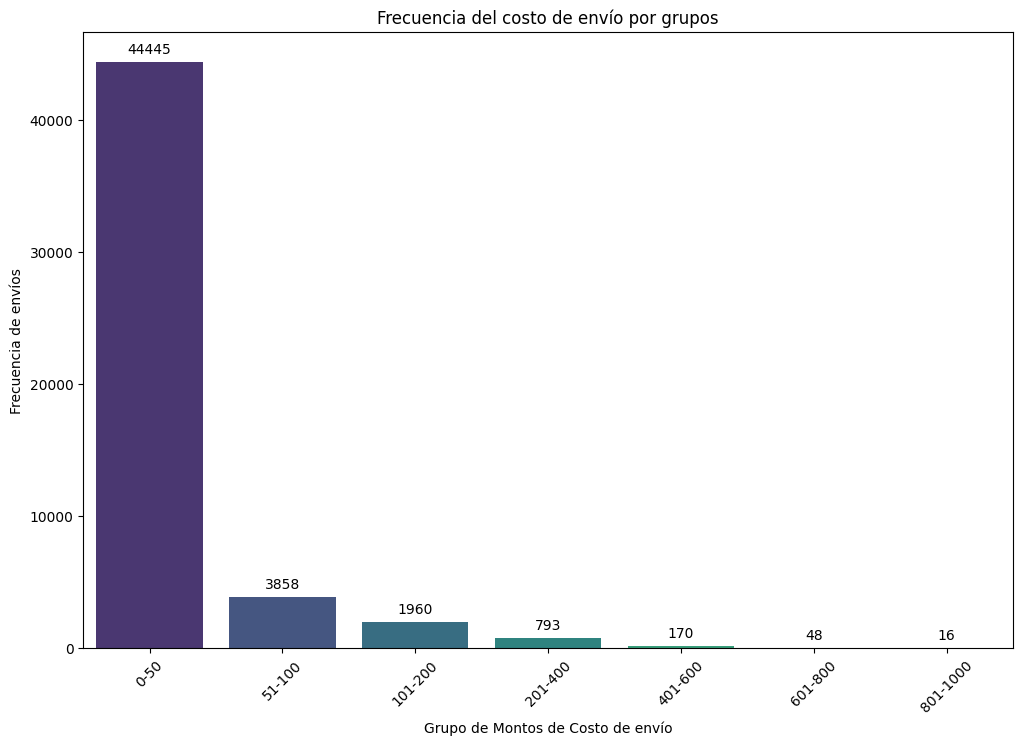

In [45]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Suponiendo que 'df_Orders_numeric'
bins = [0, 50, 100, 200, 400, 600, 800, 1000]
labels = ['0-50','51-100','101-200', '201-400', '401-600', '601-800', '801-1000']
df_Orders_numeric['Shipping_Cost_Group'] = pd.cut(df_Orders_numeric['Shipping_Cost'], bins=bins, labels=labels, right=False)

# Agrupar por 'Sales_group' y contar las ocurrencias
sales_group_count = df_Orders_numeric.groupby(['Shipping_Cost_Group'], observed=False).size().reset_index(name='count')

# Gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Shipping_Cost_Group', y='count', data=sales_group_count, palette='viridis',hue='Shipping_Cost_Group', legend=False)

# Añadiendo títulos y etiquetas
plt.title('Frecuencia del costo de envío por grupos')
plt.xlabel('Grupo de Montos de Costo de envío')
plt.ylabel('Frecuencia de envíos')
plt.xticks(rotation=45)

# Añadir etiquetas de datos en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formato sin decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

En esta gráfica que muestra la frecuencia del costo de envío por grupos, se pueden hacer los siguientes análisis:

**Distribución altamente concentrada en costos bajos:**

* El grupo 0-50 tiene un número abrumadoramente alto de envíos (44,445), lo que indica que la mayoría de los costos de envío son muy bajos. Esto sugiere que la mayoría de los productos tienen costos de envío mínimos o que quizás algunos envíos se realicen a bajo costo o incluso de forma gratuita.
* El segundo grupo más alto es 51-100, con 3,858 envíos, lo que muestra que un número mucho menor de envíos cae en este rango, pero aún es relevante comparado con los grupos siguientes.
* A partir del grupo 101-200 con 1,960 envíos, los números comienzan a caer rápidamente. Esto sugiere que los costos de envío más altos son menos comunes y pueden estar asociados a productos más voluminosos, pesados, o de destinos más distantes.

#### Frecuencia de ventas por Cantidades


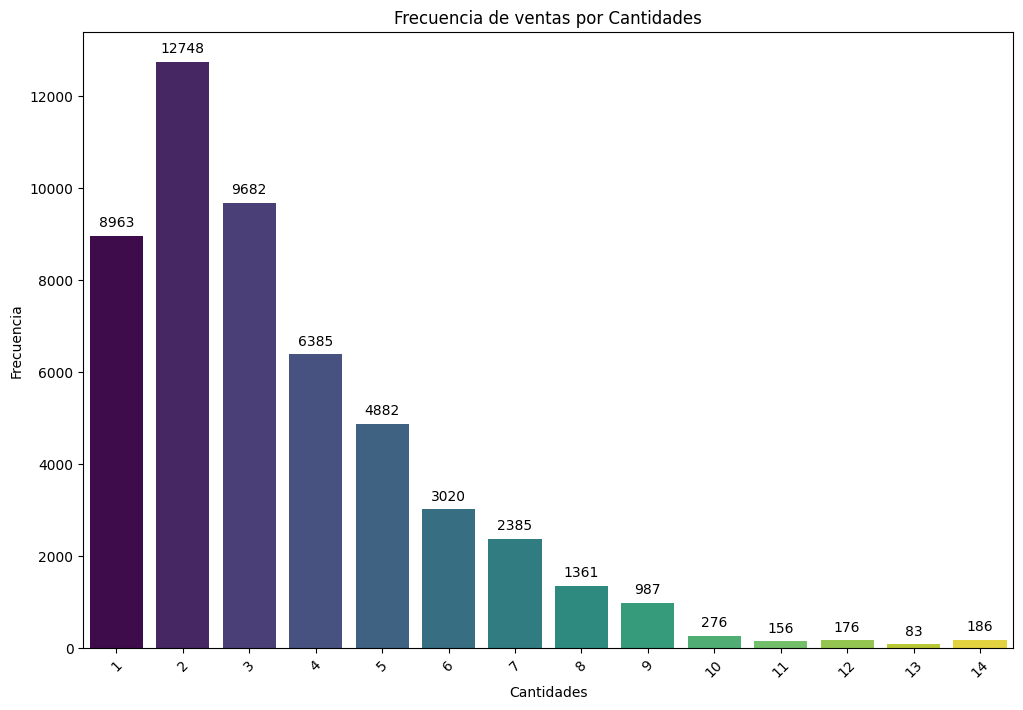

In [46]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Quantity', data=df_Orders_numeric, palette='viridis', hue='Quantity', legend=False)

# Añadiendo títulos y etiquetas
plt.title('Frecuencia de ventas por Cantidades')
plt.xlabel('Cantidades')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Añadir etiquetas de datos en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formato sin decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


En esta gráfica que muestra la frecuencia de cantidades relacionadas con los productos vendidos en una transacción, se pueden realizar los siguientes análisis:

**Dominancia de pequeñas cantidades:**

* La mayoría de las transacciones están asociadas con la compra de 1 a 3 unidades, con el pico más alto en 2 unidades (12,748), seguido de cerca por 1 unidad (8,963) y luego 3 unidades (9,682). Esto indica que la mayoría de los clientes tiende a comprar en pequeñas cantidades, lo cual es común en muchos tipos de comercio minorista.

**Disminución rápida en cantidades mayores**:

* A partir de las 4 unidades (6,385) y más, la frecuencia de compra disminuye rápidamente, lo que indica que es menos común que los clientes adquieran grandes cantidades de productos en una sola transacción.

* Desde 5 unidades (4,882) hacia adelante, el número de transacciones continúa disminuyendo significativamente, mostrando que solo una pequeña proporción de las ventas involucra más de 6 unidades.

#### Frecuencia de Ventas por Descuentos

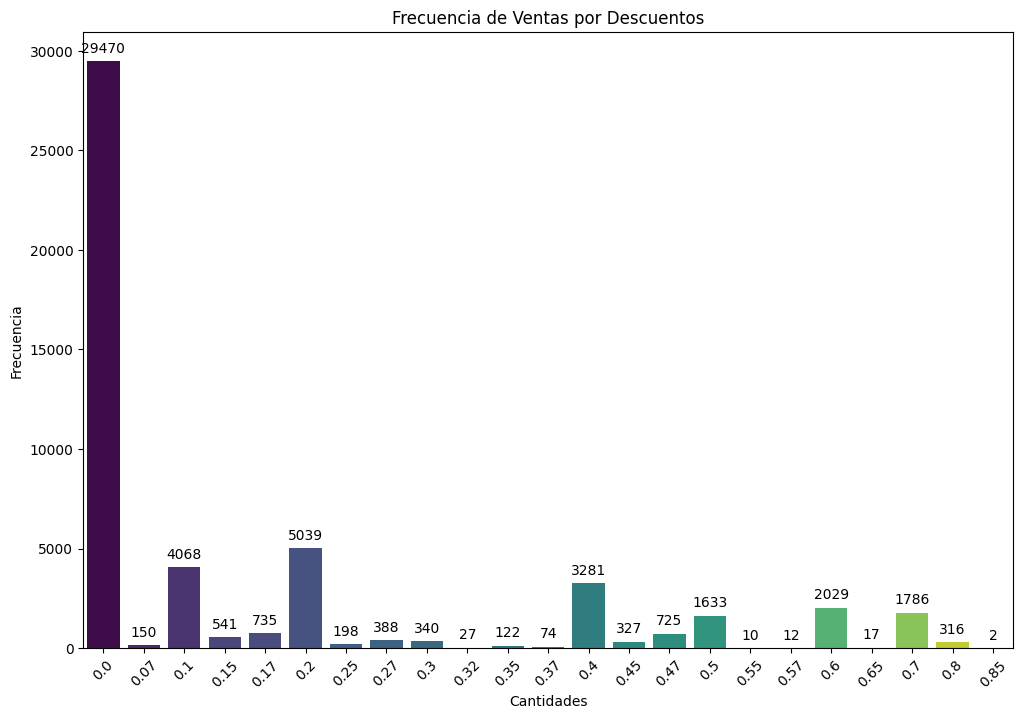

In [47]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Discount', data=df_Orders_numeric, palette='viridis', hue='Discount', legend=False)

# Añadiendo títulos y etiquetas
plt.title('Frecuencia de Ventas por Descuentos')
plt.xlabel('Cantidades')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Añadir etiquetas de datos en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formato sin decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

En esta gráfica que muestra la frecuencia de descuentos aplicados, podemos observar los siguientes patrones y realizar los siguientes análisis:

**Gran mayoría de transacciones sin descuento:**

* La barra más alta corresponde al valor de 0.0 (sin descuento), con 29,470 transacciones, lo que indica que la mayoría de las ventas no ofrecen ningún tipo de descuento. Esto es un hallazgo significativo, ya que sugiere que los descuentos son la excepción y no la norma en este dataset.

In [48]:
columns_to_drop = ['Sales_group', 'Profit_group', 'Shipping_Cost_Group']
df_Orders_numeric2 = df_Orders_numeric.drop(columns=columns_to_drop, axis=1)

correlation_matrix = df_Orders_numeric2.corr()

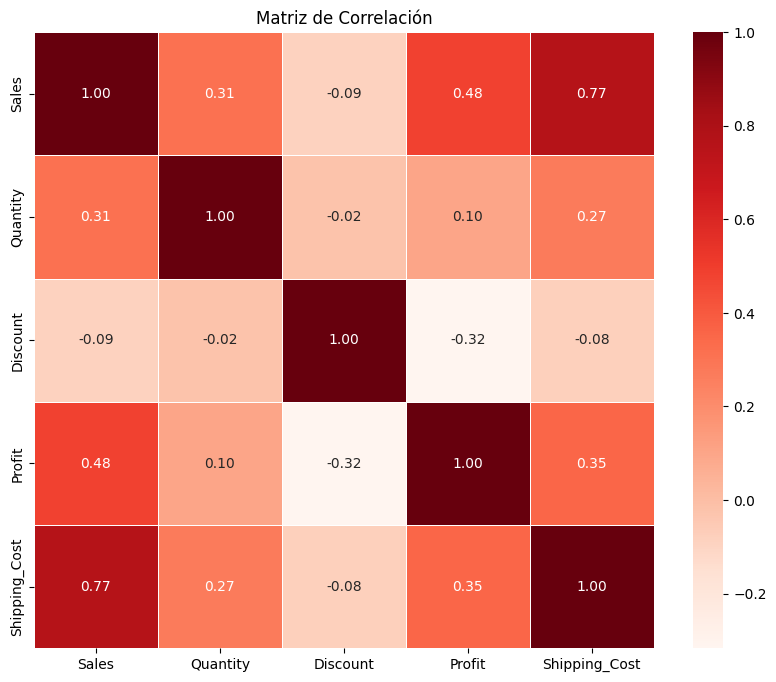

In [49]:
# Configura el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crea el heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=.5)

# Añade títulos y etiquetas
plt.title('Matriz de Correlación')
plt.show()

**Relación entre 'Sales' (Ventas) y 'Shipping_Cost' (Costo de Envío):**

Hay una fuerte correlación positiva de 0.77 entre las ventas y el costo de envío. Esto sugiere que a medida que las ventas aumentan, también lo hace el costo de envío. Esto tiene sentido, ya que ventas más altas podrían estar asociadas con productos más voluminosos o costosos, que requieren mayores costos de envío.

--

**'Sales' (Ventas) y 'Profit' (Ganancias):**

Existe una correlación moderada positiva de 0.48 entre las ventas y las ganancias. Esto indica que, en general, a medida que las ventas aumentan, las ganancias también lo hacen, pero no en una proporción perfecta. Esto sugiere que hay otros factores que afectan las ganancias, como descuentos o costos variables que no están directamente ligados al monto de la venta.

--

**Relación entre 'Discount' (Descuento) y 'Profit' (Ganancias):**

Hay una correlación negativa moderada de -0.32 entre el descuento y las ganancias. Esto es intuitivo, ya que ofrecer descuentos reduce las ganancias por venta. Sin embargo, el valor no es extremadamente alto, lo que indica que no todas las ventas con descuentos afectan las ganancias de la misma manera.

--

**'Sales' (Ventas) y 'Quantity' (Cantidad)**:

La correlación entre las ventas y la cantidad es de 0.31, lo que indica una relación positiva, pero no muy fuerte. Esto sugiere que a medida que aumenta la cantidad de productos vendidos, las ventas también aumentan, aunque no necesariamente de manera proporcional. Es posible que las ventas se vean influenciadas por el tipo de producto o su precio unitario.

--

**Relación entre 'Profit' (Ganancias) y 'Shipping_Cost' (Costo de Envío)**:

Hay una correlación positiva de 0.35 entre las ganancias y el costo de envío. Esto podría indicar que las ventas con mayores costos de envío tienden a ser más rentables, lo que podría estar relacionado con productos más caros o en mayor volumen.

--

**Correlaciones bajas o insignificantes:**

* La relación entre la cantidad de productos vendidos y el descuento aplicado es prácticamente nula (-0.02), lo que sugiere que la cantidad de productos no está afectada por el nivel de descuento aplicado.
* La relación entre el descuento y el costo de envío también es muy baja (-0.08), lo que indica que los descuentos no están relacionados con los costos logísticos.

### Ventas por Fechas

In [50]:
# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

# Agrupar por mes y sumar las ventas
monthly_sales = df_Orders.resample('M', on='Order_Date')['Sales'].sum().reset_index()
# Agrupar por mes y sumar las ganancias
monthly_profits = df_Orders.resample('M', on='Order_Date')['Profit'].sum().reset_index()

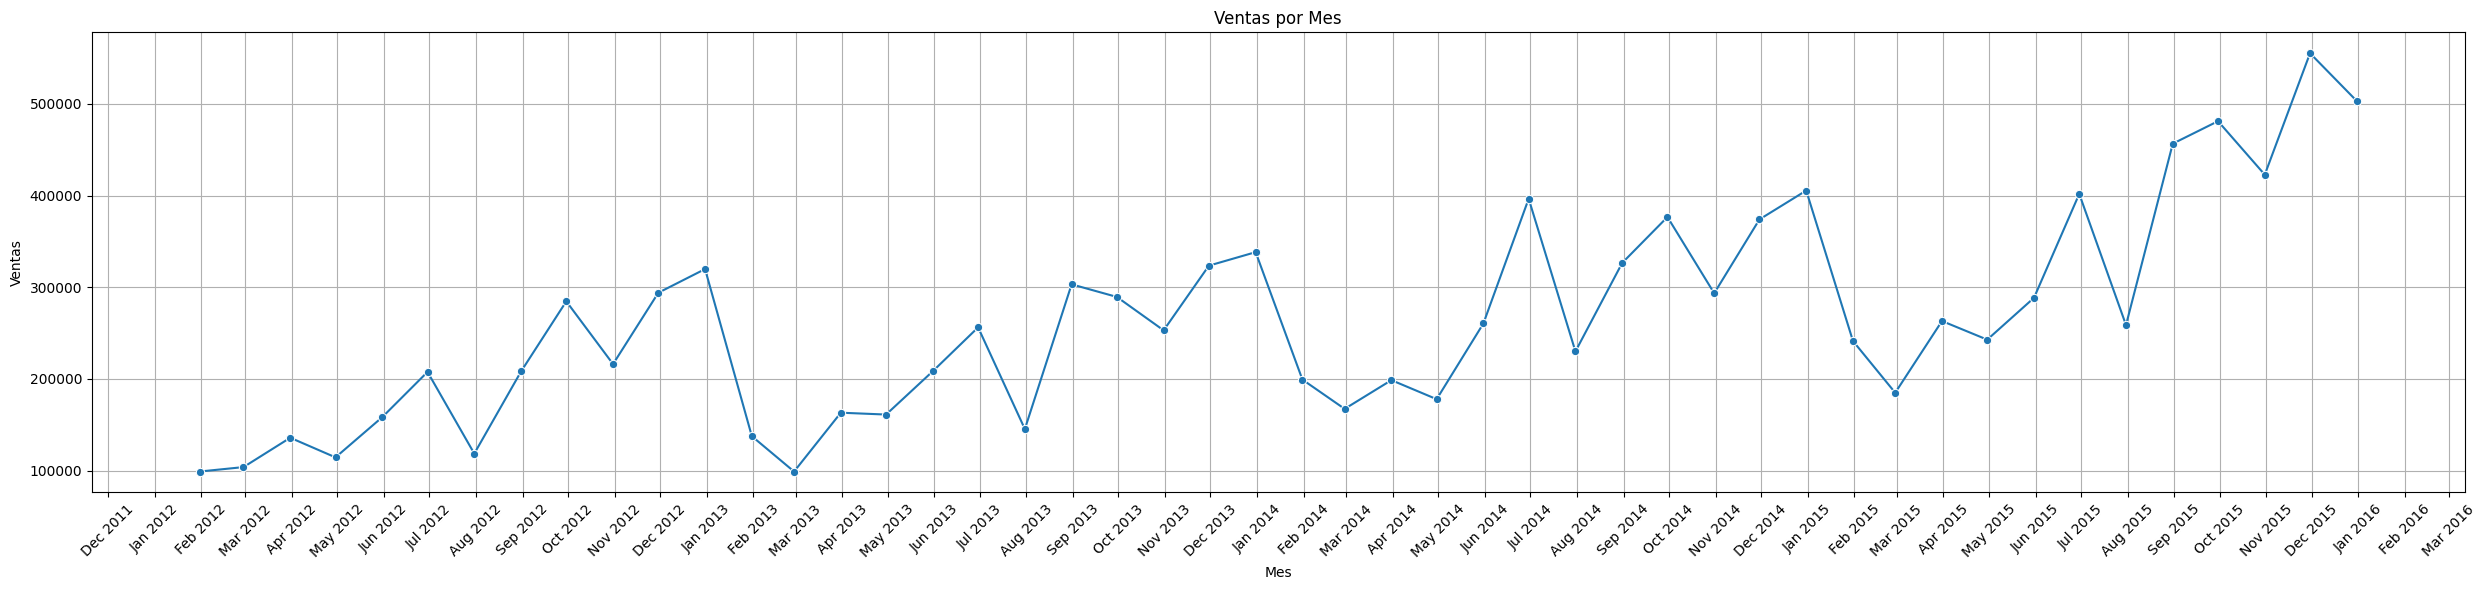

In [51]:
# Crear una gráfica de línea de las ventas por mes con eje X más claro
plt.figure(figsize=(25, 6))
sns.lineplot(x='Order_Date', y='Sales', data=monthly_sales, marker='o')

# Formatear el eje X para que muestre el mes y año
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato: 'Mes Año'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Mostrar cada mes

# Añadir título y etiquetas
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)

# Rotar las etiquetas del eje X para que se vean mejor
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el gráfico para que no se solapen las etiquetas
plt.show()



**Tendencia general al alza:**
* Aunque hay fluctuaciones en las ventas de un mes a otro, se puede observar una tendencia ascendente a lo largo de los años. Las ventas en 2012 comienzan bajas, pero hacia el final de 2015, las ventas han crecido significativamente, alcanzando valores más altos.
* Esto indica un crecimiento sostenido del negocio o la demanda de los productos en el mercado a lo largo del tiempo

* Hay picos notables de ventas en ciertos meses, lo que podría indicar un comportamiento estacional en las compras. Estos picos se observan de manera recurrente, especialmente cerca de los meses de diciembre (probablemente por las fiestas navideñas) y en algunos meses de verano como julio.

* Esto sugiere que durante estas épocas del año hay un incremento significativo en las ventas, probablemente debido a temporadas de alto consumo como el Black Friday, Navidad, rebajas de mitad de año, u otras festividades.

* Después de algunos picos, se observan caídas pronunciadas en las ventas, por ejemplo, después de diciembre de 2012 y julio de 2013. Estas caídas son normales y pueden estar relacionadas con el hecho de que las personas suelen reducir sus compras justo después de temporadas festivas o de grandes promociones.

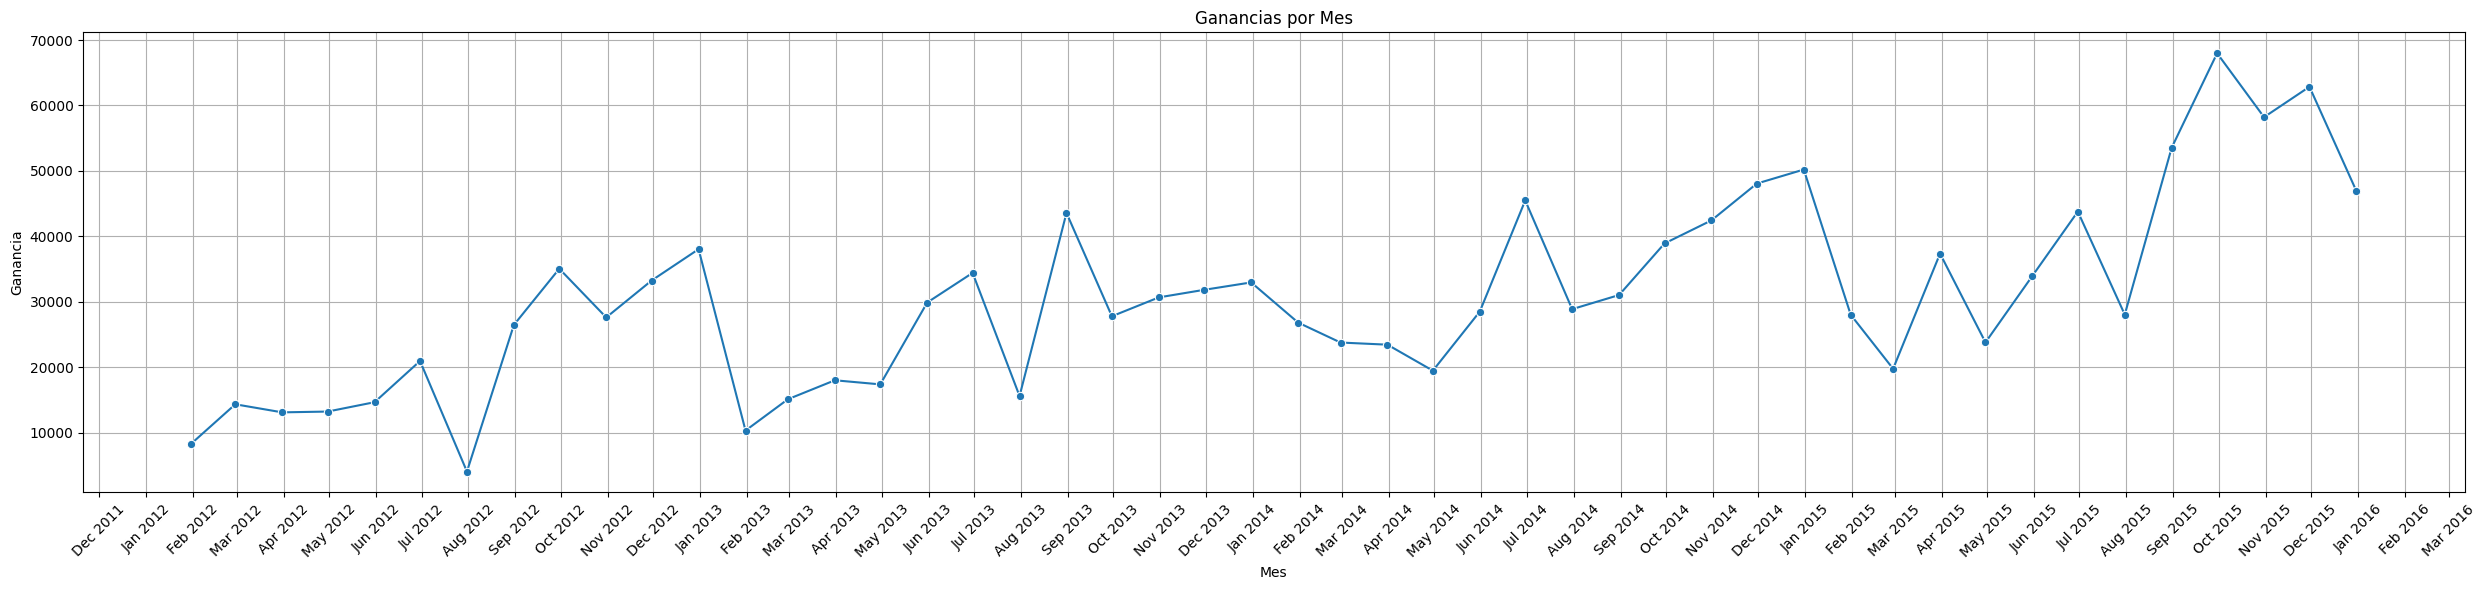

In [52]:
# Crear una gráfica de línea de las ventas por mes con eje X más claro
plt.figure(figsize=(25, 6))
sns.lineplot(x='Order_Date', y='Profit', data=monthly_profits, marker='o')

# Formatear el eje X para que muestre el mes y año
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato: 'Mes Año'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Mostrar cada mes

# Añadir título y etiquetas
plt.title('Ganancias por Mes')
plt.xlabel('Mes')
plt.ylabel('Ganancia')
plt.grid(True)

# Rotar las etiquetas del eje X para que se vean mejor
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el gráfico para que no se solapen las etiquetas
plt.show()


**Tendencia general al alza:**

* Al igual que en la gráfica de ventas, se observa una tendencia ascendente en las ganancias a lo largo de los años. Las ganancias aumentan de manera constante desde 2012 hasta 2015, con picos y caídas regulares, pero con una clara mejora en el largo plazo.

* Este crecimiento en las ganancias puede estar relacionado con un mejor control de costos, un incremento en las ventas o una combinación de ambos factores.

* Los picos de ganancias suelen coincidir con los picos de ventas, especialmente en los meses de diciembre y julio, lo que es consistente con los patrones estacionales observados en la gráfica de ventas. Esto sugiere que durante los meses de mayor volumen de ventas, también se alcanzan los mayores niveles de rentabilidad.



### Margen de Ganancias por Descuentos

In [53]:
# Calcular el margen de ganancias como porcentaje
df_Orders_numeric['Profit_Margin'] = (df_Orders_numeric['Profit'] / df_Orders_numeric['Sales']) * 100

# Agrupar por descuento y calcular el margen promedio
profit_margin_by_discount = df_Orders_numeric.groupby('Discount')['Profit_Margin'].mean().reset_index()


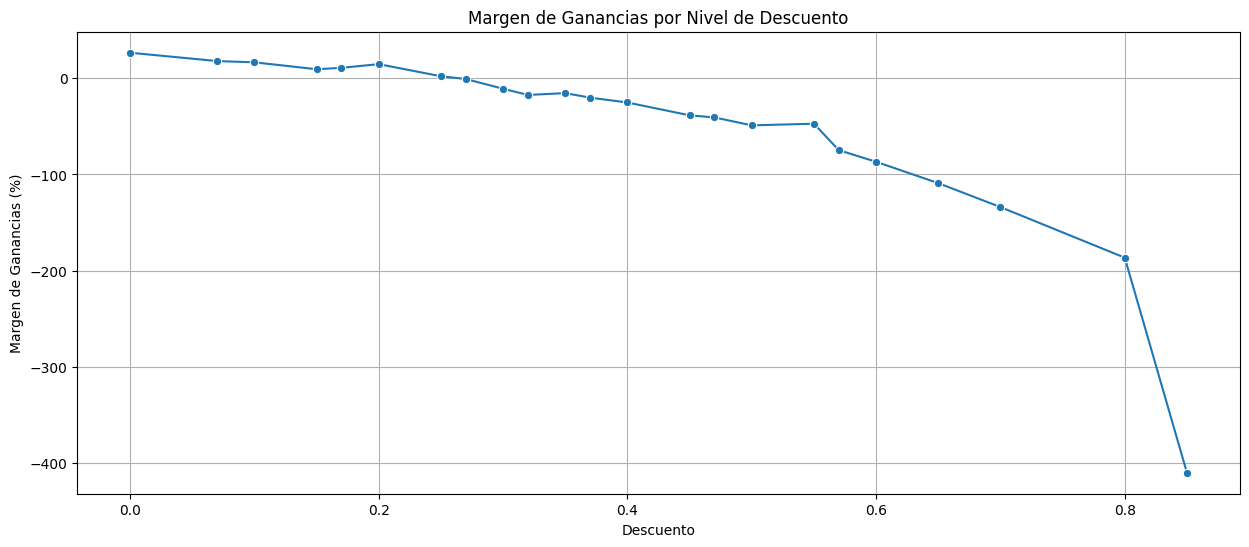

In [54]:

# Gráfica de líneas
plt.figure(figsize=(15, 6))
sns.lineplot(x='Discount', y='Profit_Margin', data=profit_margin_by_discount, marker='o')
plt.title('Margen de Ganancias por Nivel de Descuento')
plt.xlabel('Descuento')
plt.ylabel('Margen de Ganancias (%)')
plt.grid(True)
plt.show()


En esta gráfica que muestra el Margen de Ganancias por Nivel de Descuento, se pueden observar varios patrones importantes:

**Tendencia decreciente del margen de ganancias:**
* A medida que el descuento aumenta, el margen de ganancias disminuye de forma constante. Esto es lo esperado, ya que mayores descuentos reducen el ingreso total por producto, lo que afecta negativamente las ganancias.

* Para descuentos pequeños, el margen de ganancias aún es positivo, lo que sugiere que hay suficiente margen en el precio base del producto para cubrir los descuentos.

**Caída significativa a partir de un descuento del 0.25 (25%):**
* A partir del descuento del 25% aproximadamente, el margen de ganancias se vuelve negativo, lo que indica que las ventas con estos niveles de descuento están resultando en pérdidas. Esto podría estar relacionado con un mal manejo de los costos o precios demasiado bajos en relación con los costos fijos.

**Pérdidas extremas en niveles de descuento altos (0.8):**
* El punto más bajo, correspondiente a un descuento de 80%, muestra un margen extremadamente negativo (más de -400%). Esto significa que, en estos casos, las pérdidas superan con creces el costo de los productos. Estos descuentos pueden estar relacionados con liquidaciones o promociones de "descuento final" en las que la empresa está dispuesta a asumir grandes pérdidas para deshacerse del inventario.
* Esta caída drástica podría ser un signo de alerta, indicando que estas promociones deben manejarse con más cuidado para evitar pérdidas tan significativas.

**Estabilidad en los descuentos bajos (0.0 - 0.2):**
* Entre los descuentos de 0 a 20%, el margen de ganancias es bastante estable y aún positivo. Esto indica que estos niveles de descuento no afectan significativamente la rentabilidad y pueden ser sostenibles si se utilizan de manera estratégica para incentivar ventas sin sacrificar demasiadas ganancias.

### Margen de Ganancias por Costo de envios

In [55]:
# Calcular el margen de ganancias como porcentaje
df_Orders_numeric['Profit_Margin'] = (df_Orders_numeric['Profit'] / df_Orders_numeric['Sales']) * 100

# Agrupar por descuento y calcular el margen promedio
profit_margin_by_discount = df_Orders_numeric.groupby('Shipping_Cost_Group')['Profit_Margin'].mean().reset_index()


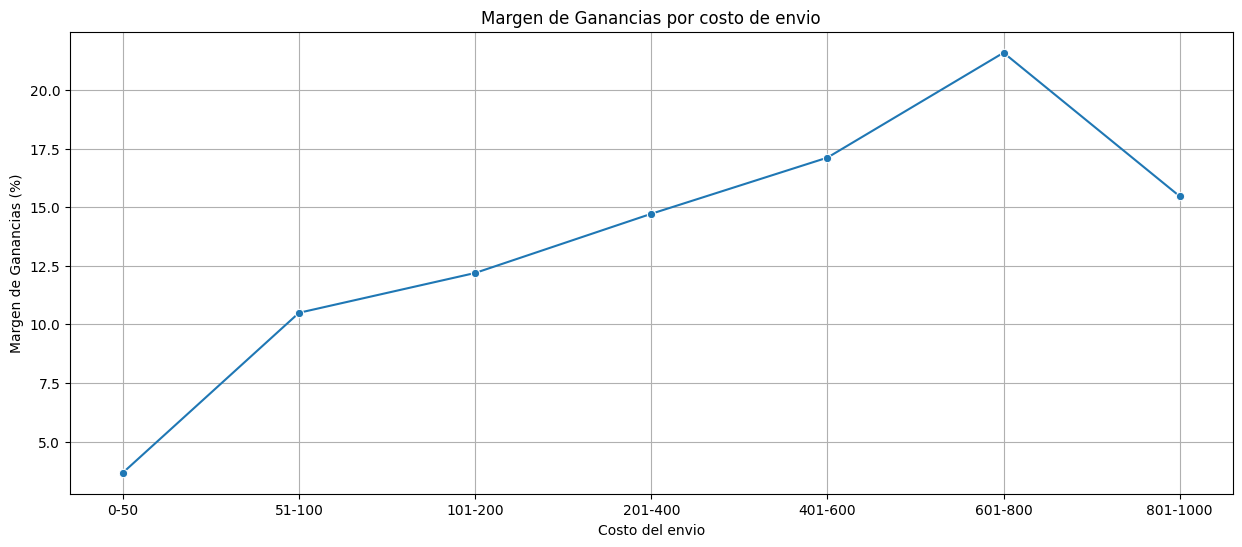

In [56]:

# Gráfica de líneas
plt.figure(figsize=(15, 6))
sns.lineplot(x='Shipping_Cost_Group', y='Profit_Margin', data=profit_margin_by_discount, marker='o')
plt.title('Margen de Ganancias por costo de envio')
plt.xlabel('Costo del envio')
plt.ylabel('Margen de Ganancias (%)')
plt.grid(True)
plt.show()


**Relación positiva inicial entre costos de envío bajos y el margen de ganancia:**
* En los primeros grupos de costos de envío (0-50 y 51-100), el margen de ganancia aumenta de manera significativa, pasando de alrededor de 5% a 12%. Esto sugiere que en estos rangos de costos de envío, las transacciones tienden a ser más rentables.
* Este comportamiento podría indicar que los productos con costos de envío bajos tienen un buen balance entre precio, volumen de ventas y margen de ganancia.

**Aumento continuo hasta el rango 601-800:**
* El margen de ganancia sigue aumentando hasta el rango de costos de envío 601-800, donde alcanza su punto máximo, cerca del 20%. Esto es interesante porque indica que los productos o transacciones que tienen costos de envío en este rango son especialmente rentables.
* Es posible que los productos que caen en esta categoría sean de mayor valor o tengan márgenes de ganancia más amplios, lo que les permite absorber los costos de envío sin afectar significativamente la rentabilidad.

**Disminución del margen de ganancia en costos de envío muy altos (801-1000):**
* A partir del rango de 801-1000, el margen de ganancia cae bruscamente a alrededor del 15%, lo que sugiere que los productos con costos de envío tan altos no son tan rentables como los de rangos menores.
* Esto podría indicar que los altos costos de envío en este rango están impactando la rentabilidad, ya sea por el aumento de costos logísticos o porque el precio del producto no es lo suficientemente alto como para compensar esos gastos.

### Costos de Envios altos

In [57]:
# Definir un umbral para considerar costos de envío altos, por ejemplo, envíos mayores a 500
high_shipping_costs = df_Orders[df_Orders['Shipping_Cost'] > 500]

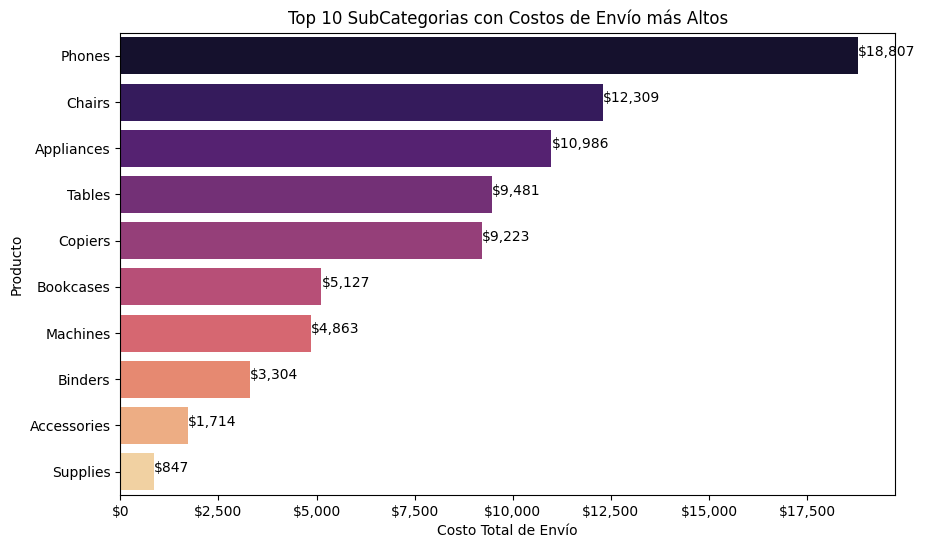

In [58]:
# Agrupar por producto o categoría y calcular el costo total de envío
high_shipping_by_product = high_shipping_costs.groupby('SubCategory')['Shipping_Cost'].sum().reset_index()

# Ordenar por costos de envío
high_shipping_by_product = high_shipping_by_product.sort_values(by='Shipping_Cost', ascending=False).head(10)

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Shipping_Cost', y='SubCategory', data=high_shipping_by_product, palette='magma')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir etiqeuta de datos
for index, value in enumerate(high_shipping_by_product['Shipping_Cost']):
    ax.text(value, index, f'${value:,.0f}', color='black', ha="left")

plt.title('Top 10 SubCategorias con Costos de Envío más Altos')
plt.xlabel('Costo Total de Envío')
plt.ylabel('Producto')
plt.show()


### Ventas por Subcategorias

In [59]:
# Agrupar por SubCategory y sumar las ventas
sales_by_subcategory = df_Orders.groupby('SubCategory')['Sales'].sum().reset_index()

# Ordenar de mayor a menor las ventas
sales_by_subcategory = sales_by_subcategory.sort_values(by='Sales', ascending=False)


In [60]:
# Agrupar por SubCategory y sumar las ganancias
profit_by_subcategory = df_Orders.groupby('SubCategory')['Profit'].sum().reset_index()

# Ordenar de mayor a menor las ganancias
profit_by_subcategory = profit_by_subcategory.sort_values(by='Profit', ascending=False)


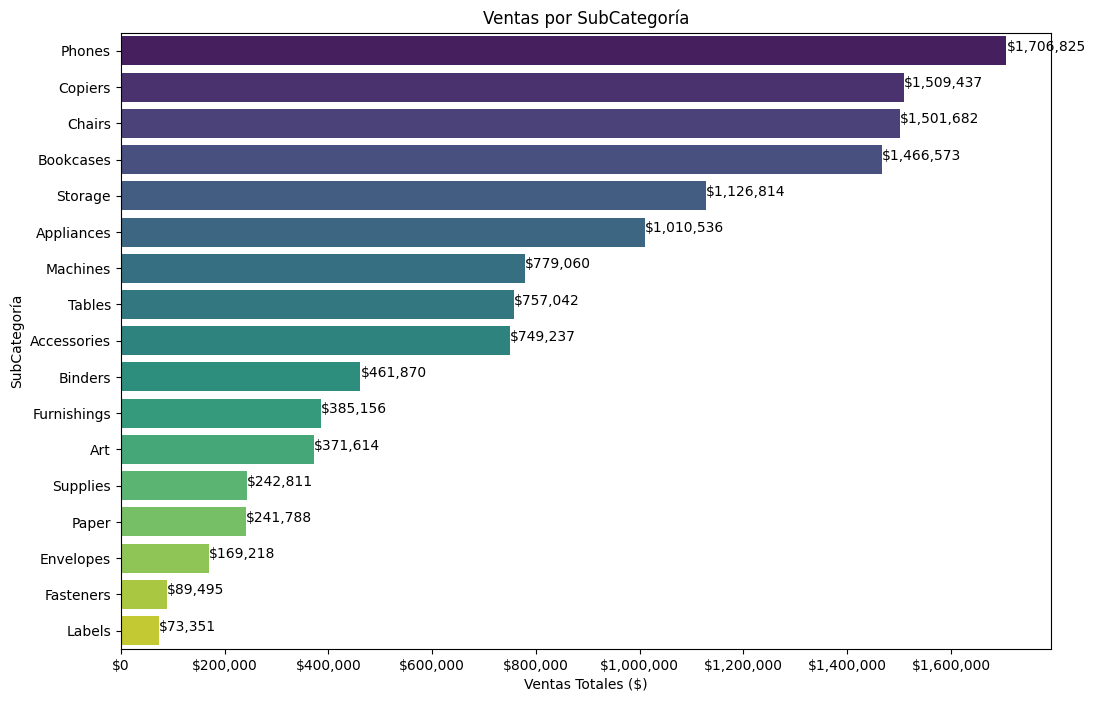

In [61]:


# Crear la gráfica de nuevo con el formato de miles y el signo de dólar
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Sales', y='SubCategory', data=sales_by_subcategory, palette='viridis')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir etiquetas de datos en cada barra
for index, value in enumerate(sales_by_subcategory['Sales']):
    ax.text(value, index, f'${value:,.0f}', color='black', ha="left")


# Añadir títulos y etiquetas
plt.title('Ventas por SubCategoría')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('SubCategoría')
plt.show()


**Ventas por SubCategoría:**
* Las subcategorías Phones, Copiers, Chairs, y Bookcases son las que generan las mayores ventas, con más de $1 millón en ventas totales cada una.

* Las subcategorías como Labels, Fasteners, y Envelopes son las que generan menores ventas, todas con menos de $200,000 en ventas totales.

### Ventas Netas por Subcategoria

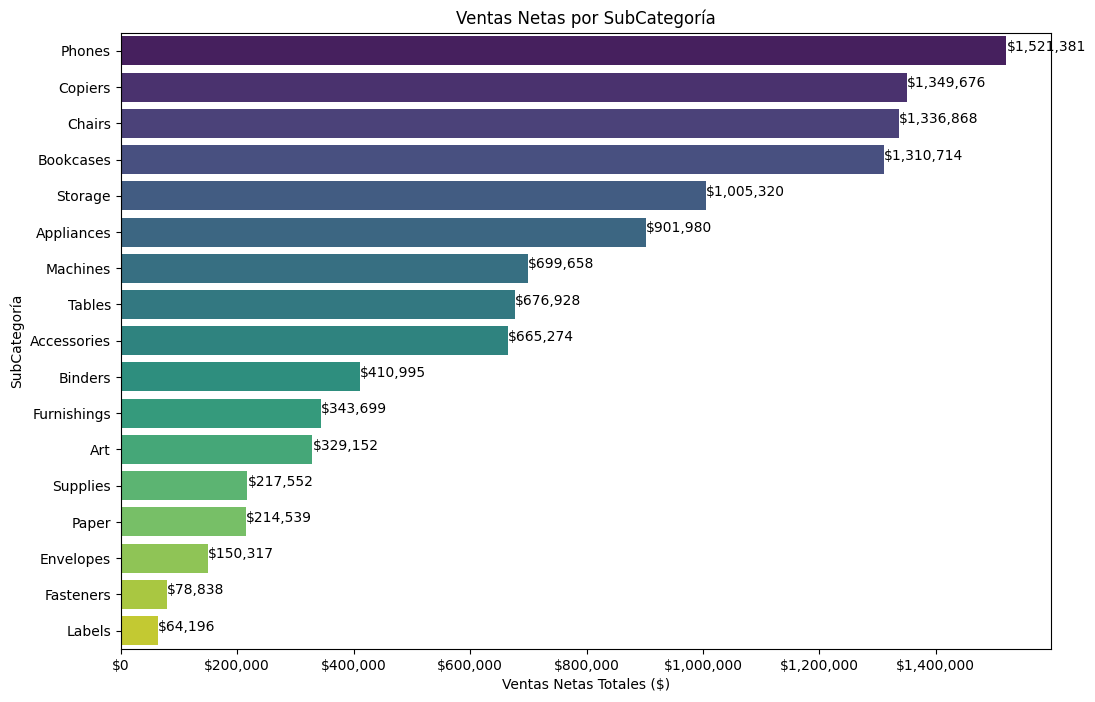

In [62]:
# Agrupar por SubCategory y sumar las ventas netas
net_sales_by_subcategory = df_Orders.groupby('SubCategory').agg({
    'Sales': 'sum',
    'Discount': 'sum',
    'Shipping_Cost': 'sum'
}).reset_index()

# Calcular las ventas netas (Ventas - Descuento - Costo de Envío)
net_sales_by_subcategory['Net_Sales'] = net_sales_by_subcategory['Sales'] - net_sales_by_subcategory['Discount'] - net_sales_by_subcategory['Shipping_Cost']

# Ordenar de mayor a menor las ventas netas
net_sales_by_subcategory = net_sales_by_subcategory.sort_values(by='Net_Sales', ascending=False)

# Crear la gráfica de barras para las ventas netas por SubCategory
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Net_Sales', y='SubCategory', data=net_sales_by_subcategory, palette='viridis')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir etiquetas de datos en cada barra
for index, value in enumerate(net_sales_by_subcategory['Net_Sales']):
    ax.text(value, index, f'${value:,.0f}', color='black', ha="left")

# Añadir títulos y etiquetas
plt.title('Ventas Netas por SubCategoría')
plt.xlabel('Ventas Netas Totales ($)')
plt.ylabel('SubCategoría')

# Mostrar la gráfica
plt.show()


**Principales subcategorías en términos de ventas netas:**

* Phones, Copiers, Chairs y Boojcases son las cuatro subcategorías que generan las mayores ventas netas, con más de $1.3 millones cada una.
   * Esto sugiere que estos productos son los más demandados en el mercado, probablemente debido a su importancia para los negocios y oficinas (e.g., equipos de oficina, comunicación, y mobiliario).

**Subcategorías en el rango medio:**

* Storage, y Appliances también tienen ventas netas significativas, en el rango de $900,000 a $1 millón. Estas subcategorías reflejan una alta demanda, pero están por debajo de los productos más vendidos.
* Machines y Tables también se destacan con cifras cercanas a los $700,000, lo que refleja una demanda estable en artículos de maquinaria y mobiliario adicional.

**Subcategorías con ventas netas más bajas:**

* En el otro extremo, subcategorías como Fasteners y Labels muestran ventas netas considerablemente más bajas, con cifras de aproximadamente $64,000 y $78,000 respectivamente.
 * Estos productos tienden a ser de menor valor agregado y su baja participación en las ventas netas podría deberse a que son productos de bajo costo, con menos frecuencia de compra o menor margen de ganancia.
 * Sin embargo, podría haber oportunidades para explorar cómo aumentar la rentabilidad de estas subcategorías, ya sea mejorando márgenes o promoviendo un mayor volumen de ventas.

### Ganancia por SubCategoria

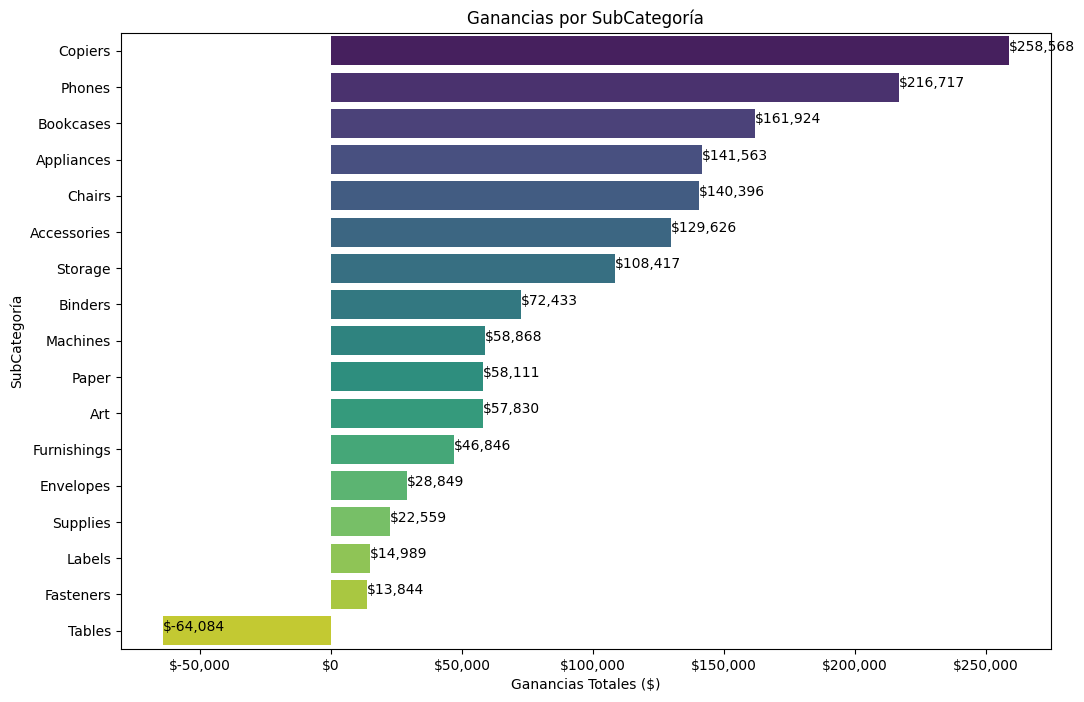

In [63]:

# Crear una gráfica de barras para las ganancias por subcategoría
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Profit', y='SubCategory', data=profit_by_subcategory, palette='viridis')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir etiquetas de datos en cada barra
for index, value in enumerate(profit_by_subcategory['Profit']):
    ax.text(value, index, f'${value:,.0f}', color='black', ha="left")


# Añadir títulos y etiquetas
plt.title('Ganancias por SubCategoría')
plt.xlabel('Ganancias Totales ($)')
plt.ylabel('SubCategoría')
plt.show()


**Ganancias por SubCategoría:**
* Copiers es la subcategoría más rentable, con una ganancia total de 258,568, seguida de Phones con 216,717 y Bookcases con 161,924. Estas subcategorías generan una rentabilidad significativa y parecen estar bien posicionadas en el mercado.
 * Estas ganancias reflejan un buen equilibrio entre ventas y costos, lo que sugiere que son productos con márgenes de ganancia considerables o que los costos asociados (como los costos de envío o descuentos) no son demasiado  altos en relación con las ventas.
 * Copiers y Phones, en particular, parecen tener una alta demanda, lo que contribuye a su rendimiento positivo.


**Subcategorías con pérdidas o bajas ganancias:**

* Supplies, Labels, y Fasteners tienen ganancias muy bajas, inferiores a 23,000, lo que sugiere que estos productos tienen una demanda limitada o que los costos están reduciendo considerablemente las ganancias.
 * Estos productos podrían estar desempeñando un rol secundario en el portafolio de ventas, o pueden necesitar una revisión de costos y estrategias de venta para mejorar su rentabilidad.
* Tables destaca por ser la única subcategoría que reporta una pérdida significativa de 64,084. Esto indica que los costos asociados a las ventas de esta subcategoría, como los descuentos y los costos de envío, son superiores a los ingresos generados. Es crucial investigar por qué esta subcategoría genera pérdidas y tomar medidas para revertir esta situación, ya sea mediante la reducción de costos o reconsiderando las estrategias de ventas y descuentos aplicados.

**Comparación de ventas y ganancias:**
* Copiers y Phones son las más rentables en ambas métricas, lo que indica que no solo son subcategorías con altos ingresos, sino también con un margen de ganancia saludable.
* Chairs tiene ventas muy altas (más de $1 millón), pero su posición en términos de ganancias es más baja, lo que sugiere que tiene un margen de ganancia más bajo.
* Bookcases también es una subcategoría que genera tanto altos ingresos como buenas ganancias, lo que la convierte en un producto sólido en términos de rendimiento.

**Subcategorías con diferencias significativas entre ventas y ganancias:**
* Tables muestra una situación inusual: a pesar de estar en el top 10 en ventas, tiene pérdidas significativas en términos de ganancias (más de $50,000 en pérdidas). Esto sugiere un problema con los costos asociados a esta subcategoría, como el costo de materiales, almacenamiento, o costos logísticos.
* Machines tiene ventas moderadas, pero está por debajo de otras subcategorías en términos de ganancias. Esto indica que sus costos pueden estar reduciendo drásticamente los márgenes de ganancia.

### Costo total por Subcategoria

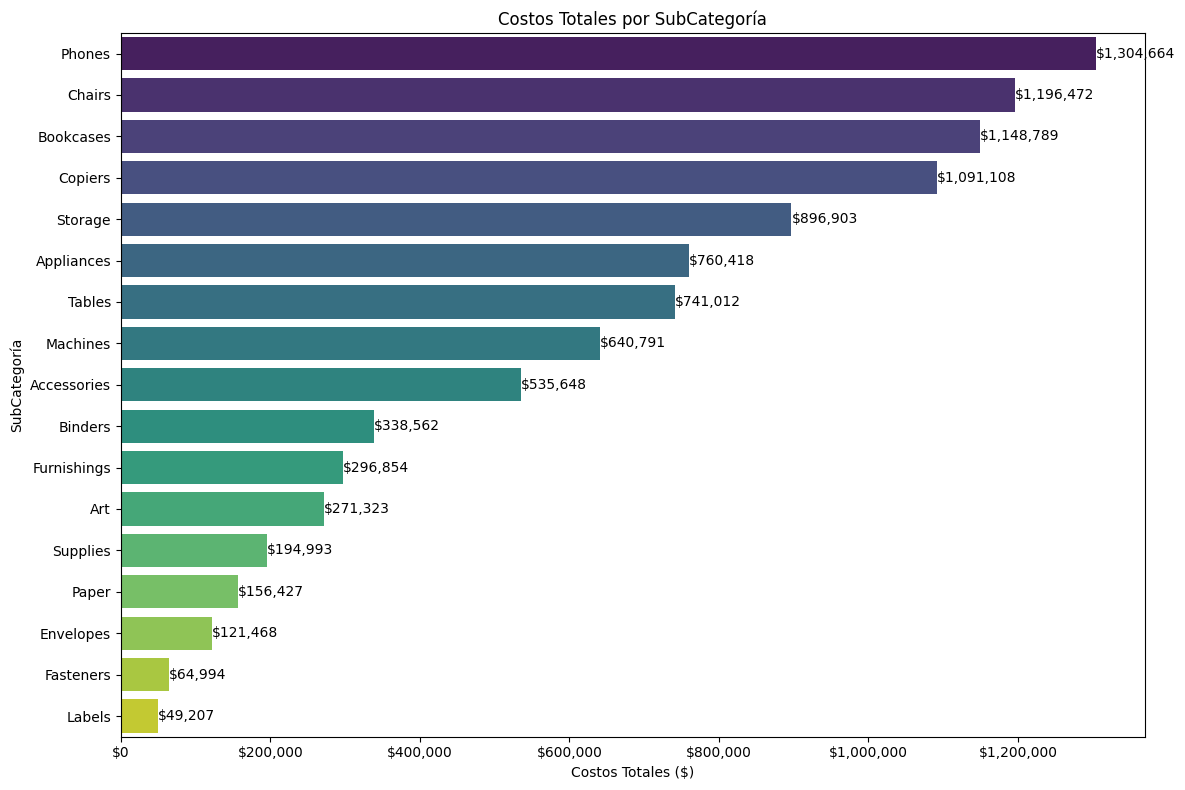

In [64]:
# Calcular la venta neta (restando descuento y costo de envío)
df_Orders['Net_Sales'] = df_Orders['Sales'] - df_Orders['Discount'] - df_Orders['Shipping_Cost']

# Calcular el costo total de la venta
df_Orders['Cost'] = df_Orders['Net_Sales'] - df_Orders['Profit']

# Agrupar por SubCategory y sumar los costos totales
cost_by_subcategory = df_Orders.groupby('SubCategory')['Cost'].sum().reset_index()

# Ordenar de mayor a menor los costos totales
cost_by_subcategory = cost_by_subcategory.sort_values(by='Cost', ascending=False)

# Crear la gráfica de barras para los costos por SubCategory
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Cost', y='SubCategory', data=cost_by_subcategory, palette='viridis')

# Añadir etiquetas de datos en cada barra
for i, value in enumerate(cost_by_subcategory['Cost']):
    ax.text(value, i, f'${value:,.0f}', va='center', ha='left', color='black')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir títulos y etiquetas
plt.title('Costos Totales por SubCategoría')
plt.xlabel('Costos Totales ($)')
plt.ylabel('SubCategoría')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**Principales subcategorías con costos más altos:**

* Phones, Chairs, Bookcases, y Copiers son las subcategorías que presentan los costos totales más altos, todas superando el millón de dólares.
 * Phones lidera la lista con un costo total de aproximadamente $1.3 millones, lo cual coincide con su alto volumen de ventas netas en el gráfico anterior. Sin embargo, si los costos son tan altos, puede haber un impacto negativo en la rentabilidad, lo que sugiere que los márgenes de ganancia podrían ser ajustados.
 * Esto podría indicar que estos productos no solo son demandados, sino que también implican costos significativos, probablemente debido a factores como los altos costos de adquisición, envío, o almacenamiento.

**Subcategorías en el rango medio de costos:**

* Storage, Appliances, Tables, y Machines tienen costos totales entre 640.000 - 900.000 lo que refleja que estas subcategorías también incurren en costos importantes.
* Estos productos probablemente se relacionan con infraestructura y equipo esencial, lo cual justifica sus costos elevados. Sin embargo, un análisis adicional sobre la relación entre estos costos y los márgenes de ganancia sería útil para evaluar su eficiencia.

**Comparación entre ventas netas y costos:**

* Al comparar este gráfico con el de Ventas Netas por SubCategoría, notamos que algunas categorías, como Phones, tienen ventas netas altas, pero también costos elevados. Esto sugiere que, aunque se vendan bien, los costos asociados podrían estar reduciendo significativamente las ganancias.
* Subcategorías como Copiers y Chairs también muestran una tendencia similar: altos costos y altas ventas, lo que podría significar que las ganancias netas podrían no ser tan altas como se espera, si no se optimizan los costos.
* Por otro lado, subcategorías como Labels y Fasteners tienen costos bajos, lo que sugiere que podrían generar márgenes de ganancia más estables, aunque los volúmenes de ventas son bajos.

### Ventas por Region

In [65]:
# Agrupar por Region y sumar las ventas
sales_by_region = df_Orders.groupby('Region')['Sales'].sum().reset_index()

# Ordenar de mayor a menor las ventas
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)


In [66]:
# Agrupar por Region y sumar las ganancias
profit_by_region = df_Orders.groupby('Region')['Profit'].sum().reset_index()

# Ordenar de mayor a menor las ganancias
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)


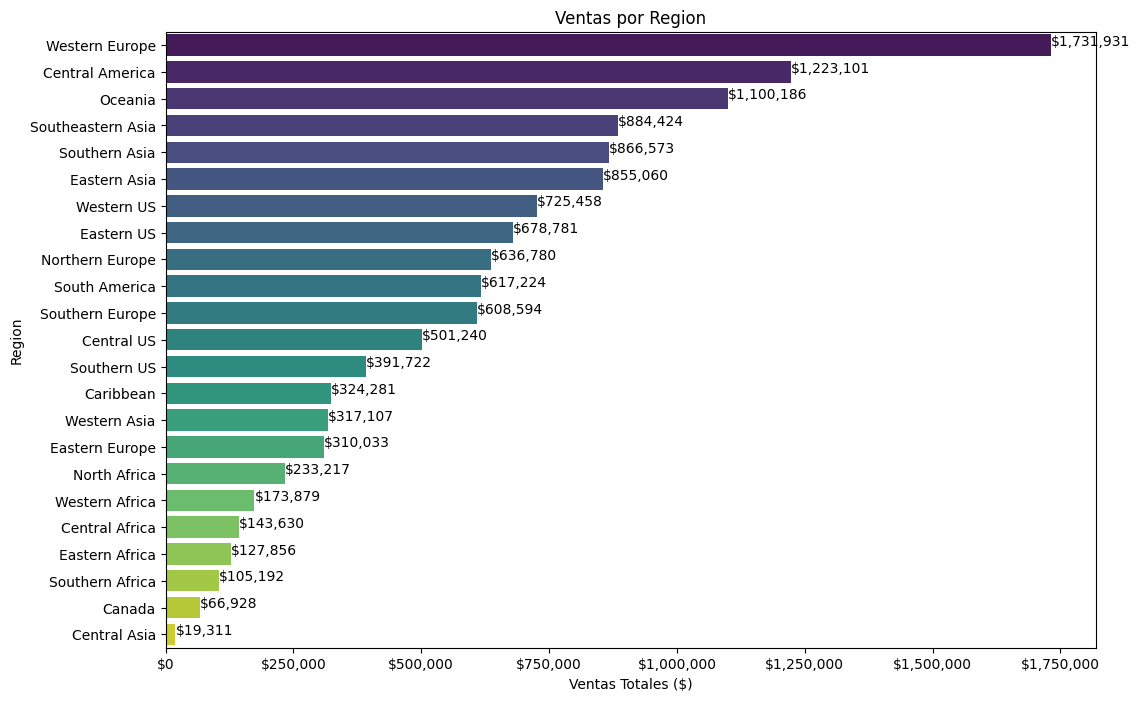

In [67]:


# Crear la gráfica de nuevo con el formato de miles y el signo de dólar
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Sales', y='Region', data=sales_by_region, palette='viridis')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir etiquetas de datos en cada barra
for index, value in enumerate(sales_by_region['Sales']):
    ax.text(value, index, f'${value:,.0f}', color='black', ha="left")

# Añadir títulos y etiquetas
plt.title('Ventas por Region')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('Region')
plt.show()


**Mercados más grandes en términos de ventas:**
* Western Europe es el mercado con las ventas más altas, superando los 1.75 millones de dólares. Este mercado lidera claramente en términos de volumen de ventas.
* Central America y Oceania también son mercados importantes, con ventas que rondan el millón de dólares.

**Mercados intermedios:**
* Mercados como Southeastern Asia, Southern Asia, Eastern Asia, y Western US tienen ventas considerables, aunque por debajo de los principales mercados, pero aún superando los 500,000 dólares.

**Mercados con menor volumen de ventas:**
* En el extremo inferior, encontramos mercados como Canada, Southern Africa, y Central Asia, con menos de 100,000 dólares en ventas, lo que los coloca como los mercados más pequeños en términos de volumen.
Estos mercados podrían representar áreas de oportunidad para crecimiento, o bien mercados menos desarrollados para los productos que se están vendiendo.

### Venta Neta por Region

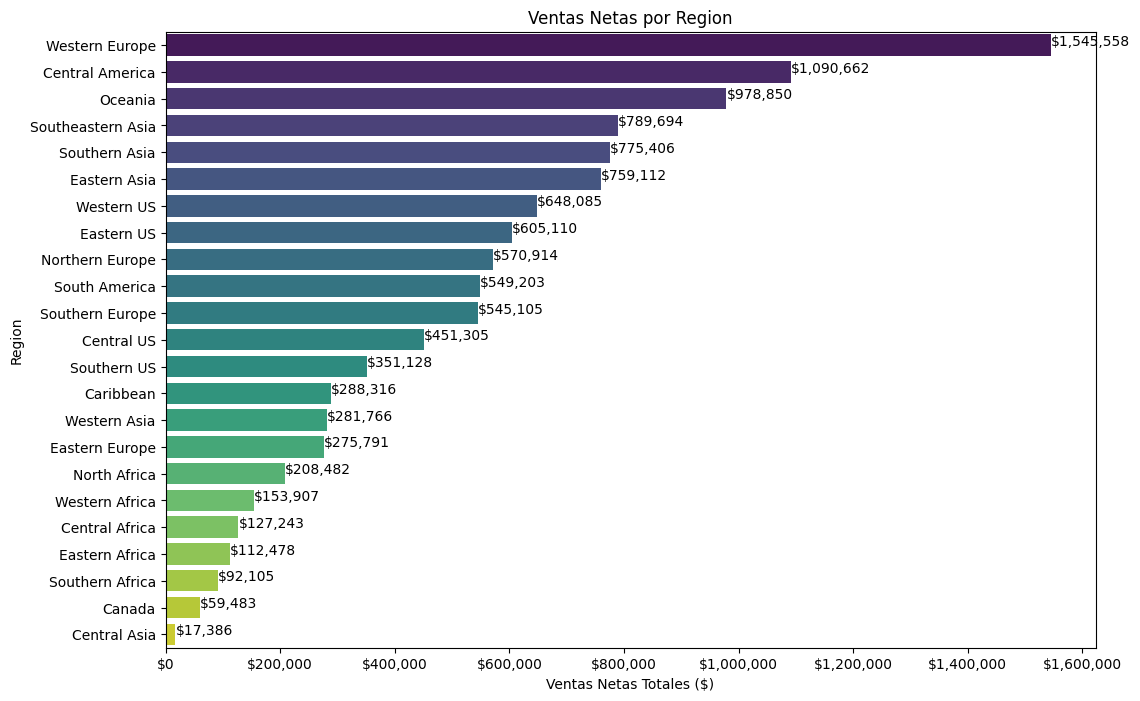

In [68]:
# Agrupar por Region y sumar las ventas netas
net_sales_by_region = df_Orders.groupby('Region').agg({
    'Sales': 'sum',
    'Discount': 'sum',
    'Shipping_Cost': 'sum'
}).reset_index()

# Calcular las ventas netas (Ventas - Descuento - Costo de Envío)
net_sales_by_region['Net_Sales'] = net_sales_by_region['Sales'] - net_sales_by_region['Discount'] - net_sales_by_region['Shipping_Cost']

# Ordenar de mayor a menor las ventas netas
net_sales_by_region = net_sales_by_region.sort_values(by='Net_Sales', ascending=False)

# Crear la gráfica de barras para las ventas netas por Region
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Net_Sales', y='Region', data=net_sales_by_region, palette='viridis')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir etiquetas de datos en cada barra
for index, value in enumerate(net_sales_by_region['Net_Sales']):
    ax.text(value, index, f'${value:,.0f}', color='black', ha="left")

# Añadir títulos y etiquetas
plt.title('Ventas Netas por Region')
plt.xlabel('Ventas Netas Totales ($)')
plt.ylabel('Region')

# Mostrar la gráfica
plt.show()

**Regiones con mayores ventas netas:**

* Western Europe lidera con una diferencia significativa, alcanzando ventas netas de más de 1.5 millones. Le sigue Central America con más de  1 millón y Oceania con casi 1 millón.
 * Estas regiones son mercados clave, donde claramente hay una gran demanda de los productos. Es posible que estas zonas tengan economías más fuertes o mercados más desarrollados para los productos que se están vendiendo.
 * La presencia de Western Europe como líder podría reflejar un enfoque comercial en este mercado, o posiblemente, una infraestructura sólida que permite mejores ventas.

**Regiones de rendimiento medio:**

* Regiones como Southeastern Asia, Southern Asia, y Eastern Asia se encuentran en el rango de 750,000 a 790,000, lo que indica que estas zonas también representan un mercado relevante.
 * Estas áreas incluyen economías emergentes o en rápido crecimiento, lo que podría explicar la demanda considerable de productos. Sin embargo, hay espacio para crecimiento en comparación con los mercados líderes como Western Europe.
* También destacan regiones como Western US y Eastern US, con ventas netas en torno a los $600,000, lo que refleja la fuerte presencia en Norteamérica, aunque no tanto como Europa o Asia.


**Regiones con ventas más bajas:**

* Las regiones con ventas netas más bajas incluyen Southern Africa, Canada, y Central Asia, con ventas netas que van desde 17,000 a 92,000.
 * Estas regiones podrían no tener la misma infraestructura de mercado o demanda para estos productos. Por ejemplo, Canada, a pesar de ser una economía fuerte, tiene ventas netas relativamente bajas en comparación con otros países, lo que podría deberse a varios factores, como la competencia local o la falta de enfoque en esta región.
 * Central Asia tiene las ventas más bajas, lo que sugiere que este mercado podría no estar siendo explotado adecuadamente, o quizás exista una baja demanda para estos productos.


### Ganancia Por Region

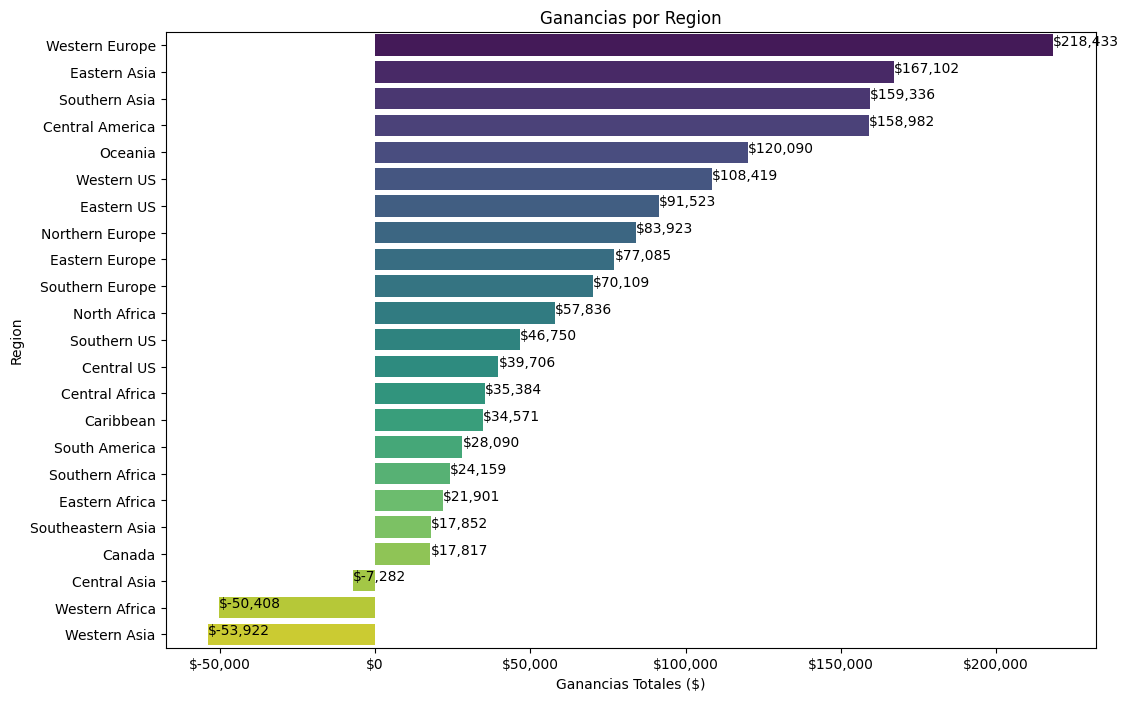

In [69]:

# Crear una gráfica de barras para las ganancias por subcategoría
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Profit', y='Region', data=profit_by_region, palette='viridis')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir etiquetas de datos en cada barra
for index, value in enumerate(profit_by_region['Profit']):
    plt.text(value, index, f'${value:,.0f}', color='black', ha="left")

# Añadir títulos y etiquetas
plt.title('Ganancias por Region')
plt.xlabel('Ganancias Totales ($)')
plt.ylabel('Region')
plt.show()


**Mercados más rentables:**
* Western Europe se destaca con una ganancia de 218,433, lo que la convierte en la región más rentable. Esto tiene sentido, dado que también lideraba en términos de ventas netas. La eficiencia operativa en esta región parece estar mejor que en otras, ya que genera tanto altos ingresos como beneficios considerables.
* Eastern Asia, Southern Asia, y Central America también tienen ganancias significativas, con montos cercanos a los 160,000. Estas regiones muestran un buen equilibrio entre ventas netas y costos, lo que las convierte en áreas altamente rentables.

**Mercados con menor rentabilidad:**
* South America, Caribbean, y Central US tienen ganancias menores, entre 28,000 y 40,000. Esto podría ser indicativo de un menor enfoque en estas regiones o de operaciones menos eficientes en términos de costos.
* Eastern Africa y Southern Africa también presentan bajas ganancias, aunque todavía positivas, lo que sugiere que estas áreas podrían tener más potencial si se lograra una mayor optimización de costos o expansión del mercado.

**Regiones con pérdidas:**

* Las regiones de Western Africa, Western Asia, y Central Asia muestran pérdidas significativas, con montos negativos de hasta 53,922. Estas pérdidas indican que, a pesar de los esfuerzos de ventas, los costos asociados superan los ingresos en estas áreas.
 * Western Africa y Western Asia en particular, con pérdidas de 50,408 y 53,922, respectivamente, podrían necesitar una revisión profunda para determinar si los altos costos de envío, descuentos o gastos operativos están afectando las ganancias. Estas regiones podrían beneficiarse de una reestructuración de costos o incluso de una reconsideración de la estrategia comercial.

**Comparación con las ventas:**
* Si comparamos esta gráfica con la gráfica de ventas por mercado que analizamos antes, podemos notar que algunos mercados con ventas altas, como Southeastern Asia, tienen bajos niveles de ganancia. Esto puede deberse a márgenes de ganancia bajos, altos costos operativos, o devoluciones frecuentes.
* Western Europe, en cambio, es consistente tanto en ventas como en ganancias, lo que indica un buen balance en este mercado.

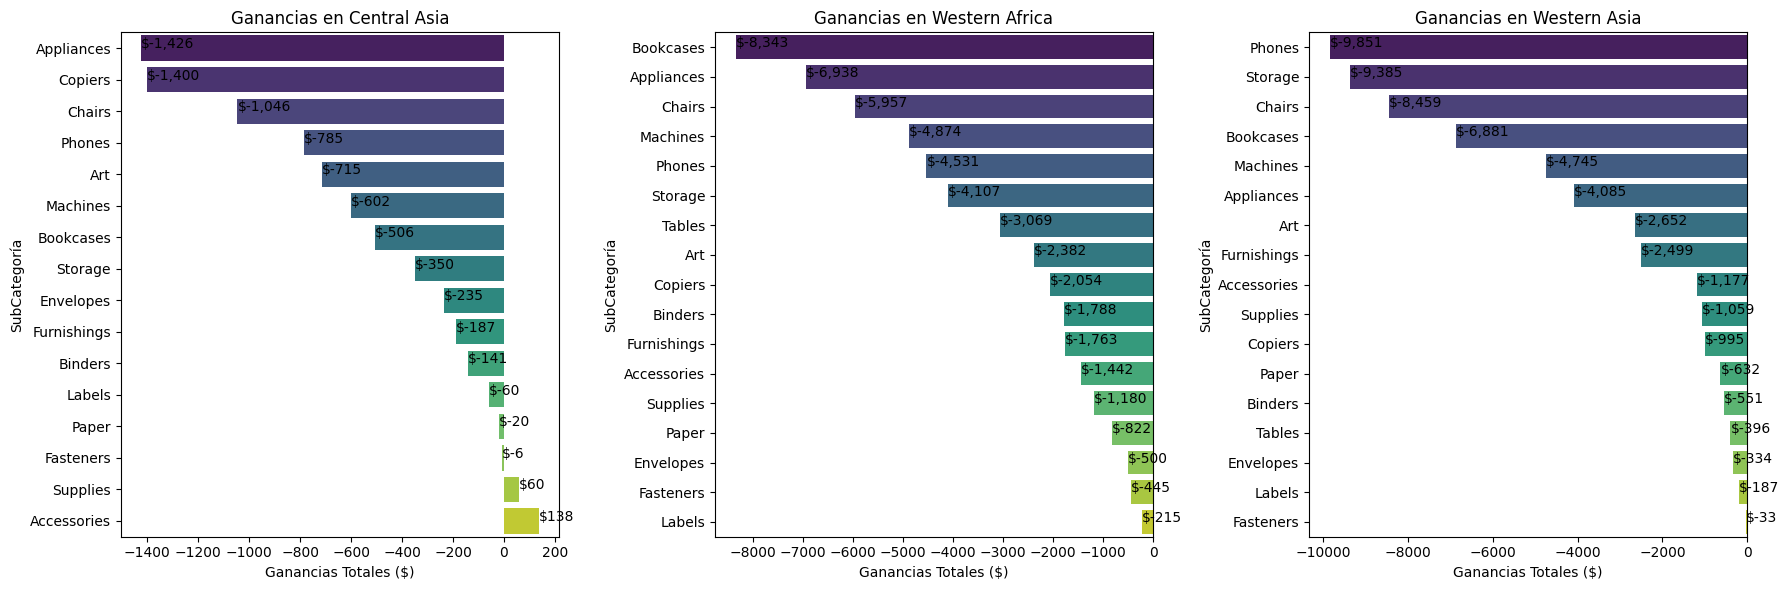

In [70]:
# Lista de las regiones de interés
regions_of_interest = ['Central Asia', 'Western Africa', 'Western Asia']

# Crear subplots con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# Iterar sobre cada región y su respectivo eje
for i, region in enumerate(regions_of_interest):
    # Filtrar las órdenes para la región actual
    df_region = df_Orders[df_Orders['Region'] == region]

    # Agrupar por SubCategory y calcular las ventas y ganancias para cada subcategoría
    subcategory_sales_profit = df_region.groupby('SubCategory').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Shipping_Cost': 'sum',
        'Discount': 'mean'
    }).reset_index()

    # Ordenar por ganancias para identificar las subcategorías que generan pérdidas
    subcategory_sales_profit = subcategory_sales_profit.sort_values(by='Profit', ascending=True)

    # Crear una gráfica de barras para las ventas por subcategoría en la región actual
    ax = sns.barplot(x='Profit', y='SubCategory', data=subcategory_sales_profit, palette='viridis', ax=axes[i])

    #añadir etiqueta de datos
    for index, value in enumerate(subcategory_sales_profit['Profit']):
        ax.text(value, index, f'${value:,.0f}', color='black', ha="left")

    # Añadir títulos y etiquetas para cada gráfico de la región
    axes[i].set_title(f'Ganancias en {region}')
    axes[i].set_xlabel('Ganancias Totales ($)')
    axes[i].set_ylabel('SubCategoría')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Central Asia:**
* Appliances, Copiers, y Chairs son las subcategorías que generan las mayores pérdidas en esta región, con Appliances liderando las pérdidas con alrededor de -$1,400.
* Otras subcategorías como Phones, Art, y Machines también están mostrando pérdidas, aunque en menor escala.
* En términos de las subcategorías con menores pérdidas o cercanas a ganancias, encontramos Accessories y Supplies, que parecen tener un comportamiento más equilibrado o incluso ligeramente positivo.

Conclusión: En Central Asia, la mayoría de las subcategorías están generando pérdidas, y solo un par de ellas parecen estar relativamente estables. Appliances y Copiers son los productos con peor desempeño en esta región, lo que podría sugerir problemas con la estrategia de ventas o costos operativos específicos para estos productos.

**Western Africa:**
* Bookcases es la subcategoría con mayores pérdidas, con más de -$8,000 en pérdidas, seguida de Appliances y Chairs, lo que indica que los muebles y electrodomésticos tienen un bajo desempeño en esta región.
* Otras subcategorías importantes como Machines y Phones también muestran pérdidas significativas, aunque en menor medida.
* Las subcategorías que generan menos pérdidas incluyen Fasteners y Labels, * aunque siguen siendo negativas.

Conclusión: En Western Africa, las pérdidas son especialmente grandes en subcategorías relacionadas con muebles y electrodomésticos. Bookcases y Appliances están afectando significativamente los márgenes en esta región. Es posible que los altos costos de logística, producción o el bajo volumen de ventas estén afectando estas categorías.

**Western Asia:**
* Las subcategorías con mayores pérdidas son Phones, Storage, y Chairs, con pérdidas que superan los -$10,000 en el caso de Phones. Esto podría estar relacionado con problemas en la demanda de tecnología o altos costos de importación.
* Bookcases y Machines también tienen pérdidas considerables, lo que sugiere que los productos de tecnología y muebles están teniendo un bajo desempeño en esta región.
* Al igual que en las otras regiones, las subcategorías con menos pérdidas incluyen Fasteners y Labels, aunque siguen sin alcanzar márgenes positivos.

Conclusión: En Western Asia, las pérdidas son especialmente altas en productos tecnológicos como Phones y en categorías de almacenamiento como Storage. Esto podría indicar que la logística o la competencia en estas áreas está afectando los márgenes de ganancia. La tecnología, en particular, parece estar teniendo problemas para ser rentable en esta región.

### Costo Total por Region

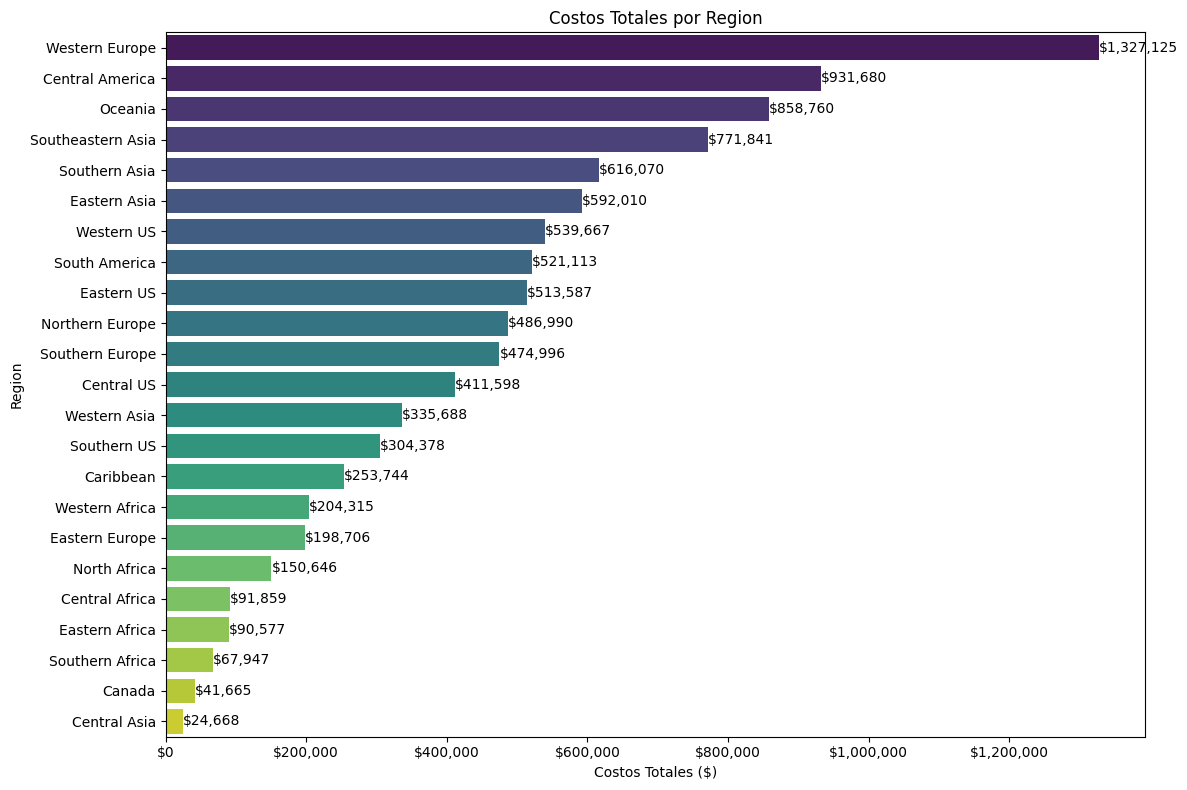

In [71]:
# Calcular la venta neta (restando descuento y costo de envío)
df_Orders['Net_Sales'] = df_Orders['Sales'] - df_Orders['Discount'] - df_Orders['Shipping_Cost']

# Calcular el costo total de la venta
df_Orders['Cost'] = df_Orders['Net_Sales'] - df_Orders['Profit']

# Agrupar por Region y sumar los costos totales
cost_by_region = df_Orders.groupby('Region')['Cost'].sum().reset_index()

# Ordenar de mayor a menor los costos totales
cost_by_region = cost_by_region.sort_values(by='Cost', ascending=False)

# Crear la gráfica de barras para los costos por Region
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Cost', y='Region', data=cost_by_region, palette='viridis')

# Añadir etiquetas de datos en cada barra
for i, value in enumerate(cost_by_region['Cost']):
    ax.text(value, i, f'${value:,.0f}', va='center', ha='left', color='black')

# Cambiar el formato del eje X para mostrar separadores de miles y el signo de dólar
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Añadir títulos y etiquetas
plt.title('Costos Totales por Region')
plt.xlabel('Costos Totales ($)')
plt.ylabel('Region')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**Regiones con costos más altos:**

* Western Europe, Central America, y Oceania tienen los costos más altos, con Western Europe liderando con más de 1.3 millones, mientras que Central America y Oceania tienen costos de 931,000 y 858,000 respectivamente.
  * Esto sugiere que estas regiones, aunque tienen altos ingresos (como se vio en el gráfico de ventas netas), también incurren en costos operativos significativos, lo que podría estar afectando la rentabilidad final.
  * La presencia de Western Europe en el primer lugar en ambas categorías (ventas y costos) implica que, aunque es un mercado lucrativo, los costos asociados a las operaciones y ventas en esta región son muy altos. Sería recomendable explorar si estos costos son debidos a los envíos, almacenamiento, o descuentos.


**Regiones con costos intermedios:**

* Regiones como Southeastern Asia, Southern Asia, y Eastern Asia tienen costos que oscilan entre 600,000 y 770,000, lo que refleja que, aunque estas zonas no son las más costosas, siguen representando una parte importante de los costos operativos.
 * Estos costos podrían deberse a las condiciones de transporte y distribución en estas áreas. Aunque estas regiones generan ingresos significativos, podría ser importante reducir costos o mejorar la eficiencia operativa.
* En América, los costos más elevados están en regiones como Western US y South America, con costos superiores a $500,000.

**Regiones con costos más bajos:**

* Regiones como Canada, Southern Africa, y Central Asia tienen los costos totales más bajos, con cifras inferiores a 100,000.
 * Esto puede indicar que estas regiones son más eficientes en cuanto a costos operativos, pero también que quizás no son un enfoque central en la estrategia de ventas, ya que tienen tanto costos como ventas bajos. Podría haber oportunidades para expandir la presencia en estas áreas sin incurrir en gastos significativos.
 * Central Asia muestra los costos más bajos con solo 24,668, lo que podría sugerir un mercado limitado o una operación muy reducida en la región.

**Comparación entre ventas netas y costos:**

* Regiones como Western Europe y Central America tienen tanto ventas netas como costos elevados. Esto sugiere que, aunque las ventas son altas, la eficiencia en términos de costos podría mejorar.
* Regiones como Southern Asia y Southeastern Asia muestran una relación más balanceada entre costos y ventas, lo que podría indicar una operación más eficiente. En estas áreas, la expansión podría ser favorable, ya que parece haber margen para crecer sin incurrir en costos desproporcionados.
* Canada, aunque tiene costos muy bajos, también tiene ventas netas significativamente bajas, lo que sugiere que no es una región prioritaria en términos de ventas. Sin embargo, si se lograra incrementar la demanda en esta región, los costos bajos podrían generar mayores márgenes de ganancia.


### Devoluciones

In [72]:
# Agrupar por SubCategory y contar el número de órdenes
orders_by_subcategory = df_Orders.groupby('SubCategory').size().reset_index(name='count')

# Ordenar de mayor a menor número de órdenes
orders_by_subcategory = orders_by_subcategory.sort_values(by='count', ascending=False)


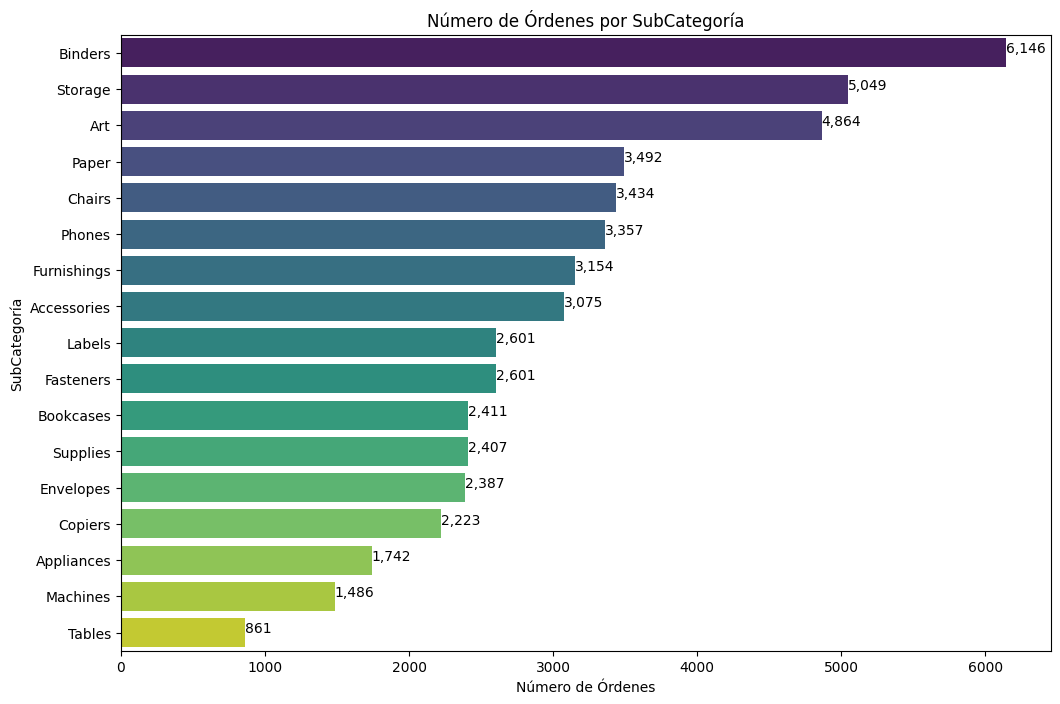

In [73]:
# Crear una gráfica de barras para el número de órdenes por subcategoría
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='count', y='SubCategory', data=orders_by_subcategory, palette='viridis')

#añadir etiqueta de datos
for index, value in enumerate(orders_by_subcategory['count']):
    ax.text(value, index, f'{value:,.0f}', color='black', ha="left")

# Añadir títulos y etiquetas
plt.title('Número de Órdenes por SubCategoría')
plt.xlabel('Número de Órdenes')
plt.ylabel('SubCategoría')
plt.show()


**Gráfica de Número de Órdenes por SubCategoría:**
* Las subcategorías con el mayor número de órdenes son Binders, Storage, y Art, todas con más de 4,000 órdenes.
* Las subcategorías con el menor número de órdenes son Machines, Appliances, y Tables, con menos de 1,500 órdenes.

In [74]:
# Unir df_Orders con df_Returns basado en 'Order_ID'
df_merged = pd.merge(df_Orders, df_Returns, on='Order_ID', how='inner')


In [75]:
# Agrupar por SubCategory y contar el número de devoluciones
returns_by_subcategory = df_merged.groupby('SubCategory').size().reset_index(name='count')

# Ordenar de mayor a menor número de devoluciones
returns_by_subcategory = returns_by_subcategory.sort_values(by='count', ascending=False)


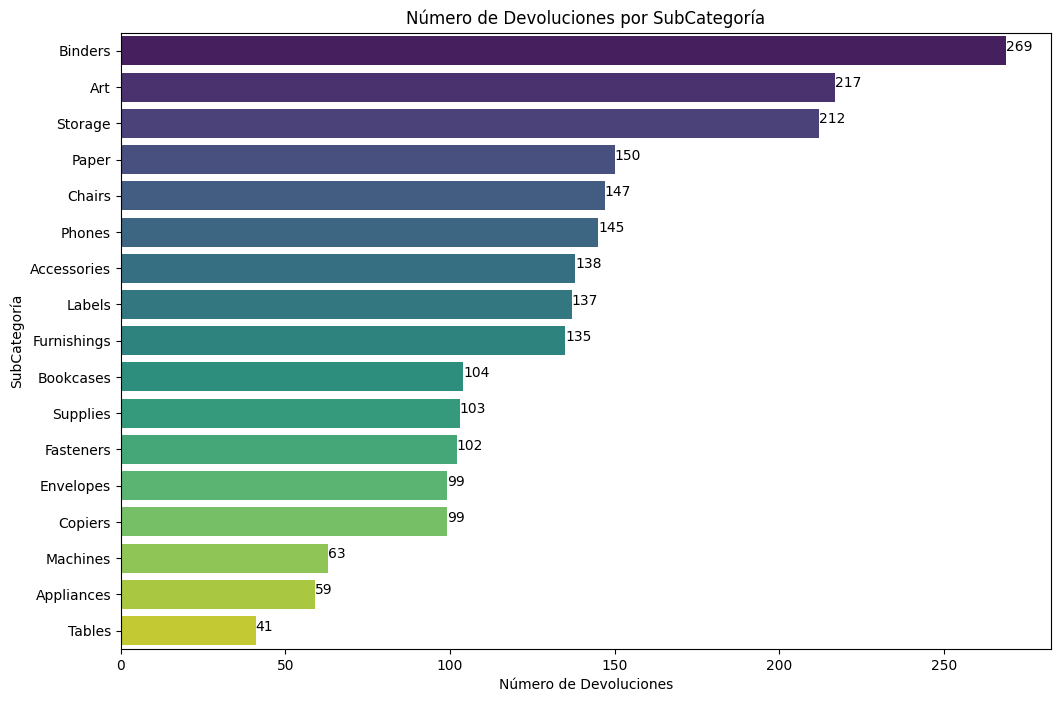

In [76]:
# Crear una gráfica de barras para las devoluciones por subcategoría
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='count', y='SubCategory', data=returns_by_subcategory, palette='viridis')

# Añadir etiqueta de datos
for index, value in enumerate(returns_by_subcategory['count']):
    ax.text(value, index, f'{value:,.0f}', color='black', ha="left")

# Añadir títulos y etiquetas
plt.title('Número de Devoluciones por SubCategoría')
plt.xlabel('Número de Devoluciones')
plt.ylabel('SubCategoría')
plt.show()


**Gráfica de Número de Devoluciones por SubCategoría:**
* Las subcategorías con más devoluciones son similares a las que tienen más órdenes: Binders, Art, y Storage lideran también en devoluciones, lo que sugiere una alta correlación entre el número de órdenes y el número de devoluciones.
* Tables, Appliances, y Machines tienen menos devoluciones, pero esto se puede explicar en parte por el menor número de órdenes que estas subcategorías generan.

In [77]:
# Unir df_Orders con df_Returns basado en 'Order_ID'
df_merged = pd.merge(df_Orders, df_Returns, on='Order_ID', how='inner')


In [78]:
# Agrupar por SubCategory y contar el número total de órdenes
orders_by_subcategory = df_Orders.groupby('SubCategory').size().reset_index(name='total_orders')

# Agrupar por SubCategory en el DataFrame combinado y contar el número de devoluciones
returns_by_subcategory = df_merged.groupby('SubCategory').size().reset_index(name='returns')



In [79]:
# Unir los dos DataFrames
df_return_rate = pd.merge(orders_by_subcategory, returns_by_subcategory, on='SubCategory', how='left')

# Reemplazar NaN en 'returns' con 0 (para subcategorías sin devoluciones)
df_return_rate['returns'] = df_return_rate['returns'].fillna(0)

# Calcular el porcentaje de devoluciones
df_return_rate['return_percentage'] = (df_return_rate['returns'] / df_return_rate['total_orders']) * 100


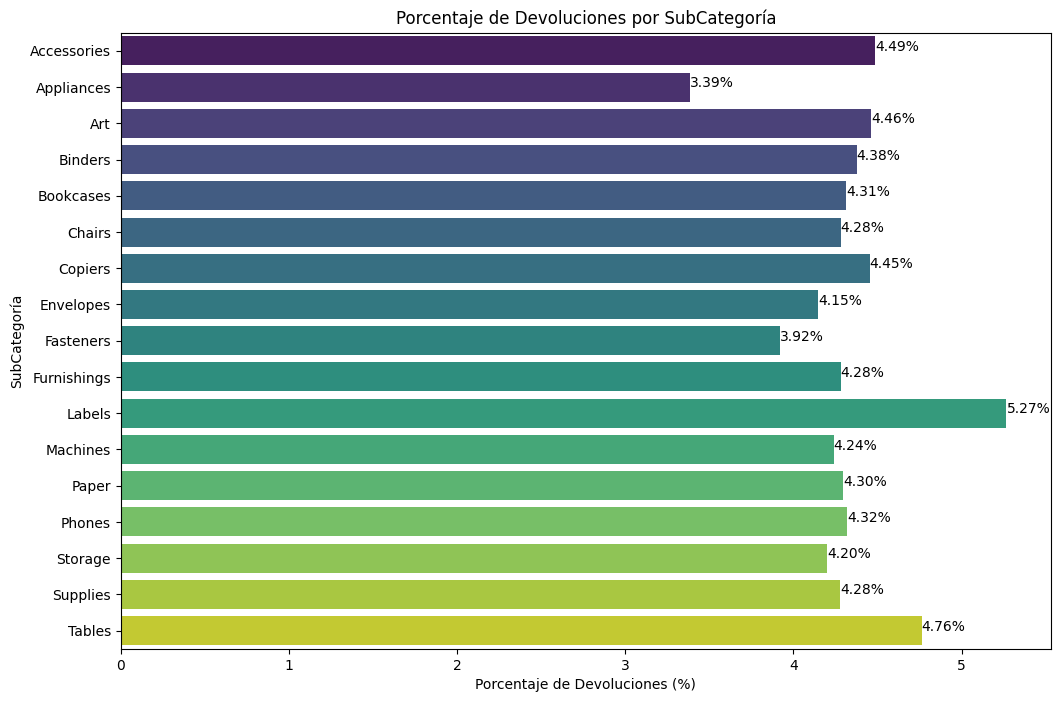

In [80]:
# Crear una gráfica de barras para el porcentaje de devoluciones por subcategoría
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='return_percentage', y='SubCategory', data=df_return_rate, palette='viridis')

# Añadir etiqueta de datos en porcentaje
for index, value in enumerate(df_return_rate['return_percentage']):
    ax.text(value, index, f'{value:.2f}%', color='black', ha="left")

# Añadir títulos y etiquetas
plt.title('Porcentaje de Devoluciones por SubCategoría')
plt.xlabel('Porcentaje de Devoluciones (%)')
plt.ylabel('SubCategoría')
plt.show()


**Gráfica de Porcentaje de Devoluciones por SubCategoría:**
* Accessories y Appliances tienen los porcentajes más altos de devoluciones, rondando el 4-5%, lo que sugiere que, aunque no tienen el mayor número de devoluciones en términos absolutos, una gran proporción de sus órdenes terminan siendo devueltas.
* Tables, a pesar de tener un número bajo de devoluciones en términos absolutos, tiene uno de los porcentajes más bajos de devoluciones, lo que indica que la mayoría de sus pedidos no son devueltos.